# Dataset for Scientific Paper

### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats
import plotly
import csv
import random
from scipy.stats import ks_2samp
import polars as pl

In [239]:
print("Polars version:", pl.__version__)

Polars version: 1.8.2


In [241]:
print("Numpy version:", np.__version__)

Numpy version: 1.26.4


### Dataset

In [3]:
pl.Config.set_tbl_rows(200)

polars.config.Config

In [8]:
import os
print(os.getcwd())


C:\Users\Samsung\Documents\DOTTORATO\GitHub\NSE_Lombardy


In [40]:
#Uploading the dataset
full_data = pl.read_csv('C:/Users/Samsung/Documents/THESIS/Luca/dataset_utilizzabile.csv')

full_data.head()

shape: (5, 105)
┌──────────┬─────────┬──────────┬────────┬───┬─────────────┬──────┬───────┬──────────────────────┐
│ ASATotal ┆ Ala     ┆ Allele 1 ┆ Arg    ┆ … ┆ BirthMethod ┆ BIS  ┆ Twins ┆ id                   │
│ ---      ┆ ---     ┆ ---      ┆ ---    ┆   ┆ ---         ┆ ---  ┆ ---   ┆ ---                  │
│ f64      ┆ f64     ┆ str      ┆ f64    ┆   ┆ str         ┆ f64  ┆ f64   ┆ i64                  │
╞══════════╪═════════╪══════════╪════════╪═══╪═════════════╪══════╪═══════╪══════════════════════╡
│ 0.212    ┆ 463.711 ┆ null     ┆ 5.211  ┆ … ┆ Naturale    ┆ null ┆ null  ┆ 4216564817612598001  │
│ 0.121    ┆ 372.249 ┆ null     ┆ 45.458 ┆ … ┆ Naturale    ┆ 1.0  ┆ null  ┆ -1256807065201540826 │
│ 0.209    ┆ 815.699 ┆ null     ┆ 28.218 ┆ … ┆ Cesareo     ┆ 0.0  ┆ null  ┆ -7589139220525689339 │
│ 0.236    ┆ 328.315 ┆ null     ┆ 7.004  ┆ … ┆ Naturale    ┆ 0.0  ┆ null  ┆ 6738088326278308435  │
│ 0.304    ┆ 504.553 ┆ null     ┆ 18.826 ┆ … ┆ Naturale    ┆ 0.0  ┆ null  ┆ 7169442979252900518  │
└──────────┴─────────┴──────────┴────────┴───┴─────────────┴──────┴───────┴──────────────────────┘

In [42]:
full_data = full_data.sort('SamTimeCollected')

In [25]:
dis = pl.read_excel('C:/Users/Samsung/Documents/THESIS/Per Gloria.xlsx')

In [27]:
dis = dis.rename({"CODIE NEONATO": "SampleBarcode"})

In [29]:
dis.head()

shape: (5, 3)
┌───────────────┬──────────┬───────────┐
│ SampleBarcode ┆ DIAGNOSI ┆ CATEGORIA │
│ ---           ┆ ---      ┆ ---       │
│ str           ┆ str      ┆ str       │
╞═══════════════╪══════════╪═══════════╡
│ 1600072855    ┆ MTHFR    ┆ AA        │
│ 1600096585    ┆ CBS      ┆ AA        │
│ 19LD032896    ┆ CBS      ┆ AA        │
│ 19LD011001    ┆ CBS      ┆ AA        │
│ 1500121493    ┆ PHE      ┆ AA        │
└───────────────┴──────────┴───────────┘

In [44]:
full_data.shape

(985788, 105)

In [46]:
full_data = full_data.drop(['Allele 1','City', 'Etnicity', 'Sampling', 'AnswerIX', 'SampleQuality' ])

In [48]:
babies_d = full_data.join(dis, on="SampleBarcode", how="left")
babies_d

shape: (985_788, 101)
┌──────────┬─────────┬─────────┬────────┬───┬───────┬──────────────────────┬──────────┬───────────┐
│ ASATotal ┆ Ala     ┆ Arg     ┆ Cit    ┆ … ┆ Twins ┆ id                   ┆ DIAGNOSI ┆ CATEGORIA │
│ ---      ┆ ---     ┆ ---     ┆ ---    ┆   ┆ ---   ┆ ---                  ┆ ---      ┆ ---       │
│ f64      ┆ f64     ┆ f64     ┆ f64    ┆   ┆ f64   ┆ i64                  ┆ str      ┆ str       │
╞══════════╪═════════╪═════════╪════════╪═══╪═══════╪══════════════════════╪══════════╪═══════════╡
│ null     ┆ 230.42  ┆ 12.66   ┆ 13.8   ┆ … ┆ 0.0   ┆ 798669216849525467   ┆ null     ┆ null      │
│ null     ┆ 228.77  ┆ 11.44   ┆ 7.49   ┆ … ┆ 0.0   ┆ -3045315683506551317 ┆ null     ┆ null      │
│ null     ┆ 248.25  ┆ 10.12   ┆ 13.88  ┆ … ┆ null  ┆ 5655596528266926376  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 8999108248963732586  ┆ null     ┆ null      │
│ null     ┆ 254.93  ┆ 2.25    ┆ 12.82  ┆ … ┆ 0.0   ┆ -2062742519198422210 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 3467001463626499211  ┆ null     ┆ null      │
│ null     ┆ 204.82  ┆ 4.27    ┆ 17.81  ┆ … ┆ 0.0   ┆ 5404533278905550421  ┆ null     ┆ null      │
│ null     ┆ 357.81  ┆ 3.92    ┆ 9.23   ┆ … ┆ 0.0   ┆ -7108849192791561097 ┆ null     ┆ null      │
│ null     ┆ 279.2   ┆ 3.14    ┆ 16.42  ┆ … ┆ 0.0   ┆ -8007399401642400209 ┆ null     ┆ null      │
│ null     ┆ 334.23  ┆ 2.55    ┆ 12.12  ┆ … ┆ 0.0   ┆ 8291753707470943964  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 4828165840669196153  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 6524671024842925972  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 7290003871902494665  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 8334662152239453935  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 2701559838426245718  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -8973680094473528699 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -6389631536696753457 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 3269271657721219149  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -8760416503613157783 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 17935725851028301    ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 6022695222053105996  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -6963249249166698392 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -7591932376444582831 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -2700099820266017892 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 4288897486594250678  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 2928516856927018644  ┆ null     ┆ null      │
│ null     ┆ 323.415 ┆ 9.835   ┆ 15.21  ┆ … ┆ 0.0   ┆ -4924243677909045048 ┆ null     ┆ null      │
│ null     ┆ 273.18  ┆ 21.7    ┆ 21.62  ┆ … ┆ 0.0   ┆ 1466631020906461301  ┆ null     ┆ null      │
│ null     ┆ 204.04  ┆ 10.805  ┆ 15.065 ┆ … ┆ 0.0   ┆ -4051612118816028339 ┆ null     ┆ null      │
│ null     ┆ 193.28  ┆ 15.95   ┆ 25.26  ┆ … ┆ 0.0   ┆ -6224147610971930503 ┆ null     ┆ null      │
│ null     ┆ 265.66  ┆ 43.03   ┆ 28.1   ┆ … ┆ 0.0   ┆ 4178353816737647132  ┆ null     ┆ null      │
│ null     ┆ 198.52  ┆ 8.21    ┆ 11.86  ┆ … ┆ 0.0   ┆ 7448699820135107656  ┆ null     ┆ null      │
│ null     ┆ 280.69  ┆ 10.82   ┆ 14.86  ┆ … ┆ 0.0   ┆ -3194906354733799552 ┆ null     ┆ null      │
│ null     ┆ 145.39  ┆ 6.31    ┆ 12.46  ┆ … ┆ 0.0   ┆ -406482665783441776  ┆ null     ┆ null      │
│ null     ┆ 297.64  ┆ 8.39    ┆ 9.18   ┆ … ┆ 0.0   ┆ -2049124752551798812 ┆ n

In [50]:
babies_d = babies_d.with_columns(replaced=pl.col("DIAGNOSI").replace(None, 'SANO'))
babies_d = babies_d.drop('DIAGNOSI')
babies_d = babies_d.rename({"replaced": "DIAGNOSI"})
babies_d.group_by('DIAGNOSI').len()

shape: (31, 2)
┌────────────┬────────┐
│ DIAGNOSI   ┆ len    │
│ ---        ┆ ---    │
│ str        ┆ u32    │
╞════════════╪════════╡
│ PA         ┆ 2      │
│ HPA        ┆ 56     │
│ CIT1       ┆ 8      │
│ VLCAD      ┆ 7      │
│ MMA        ┆ 2      │
│ 3MCC       ┆ 3      │
│ SANO       ┆ 985590 │
│ CblA       ┆ 1      │
│ CPT2       ┆ 1      │
│ CUD        ┆ 3      │
│ PHE        ┆ 16     │
│ ARG        ┆ 1      │
│ 2MBG       ┆ 2      │
│ CBS        ┆ 3      │
│ BKT        ┆ 1      │
│ TFP EXITUS ┆ 3      │
│ PKU        ┆ 29     │
│ SCAD       ┆ 16     │
│ ARG1       ┆ 1      │
│ CblD       ┆ 1      │
│ GA1        ┆ 3      │
│ CPS1       ┆ 1      │
│ TYR3       ┆ 1      │
│ GA2        ┆ 5      │
│ CIT 1      ┆ 1      │
│ IBG        ┆ 3      │
│ ASA        ┆ 1      │
│ MTHFR      ┆ 1      │
│ IVA        ┆ 3      │
│ CblC       ┆ 11     │
│ MCAD       ┆ 12     │
└────────────┴────────┘

In [52]:
babies_d

shape: (985_788, 101)
┌──────────┬─────────┬─────────┬────────┬───┬───────┬──────────────────────┬───────────┬──────────┐
│ ASATotal ┆ Ala     ┆ Arg     ┆ Cit    ┆ … ┆ Twins ┆ id                   ┆ CATEGORIA ┆ DIAGNOSI │
│ ---      ┆ ---     ┆ ---     ┆ ---    ┆   ┆ ---   ┆ ---                  ┆ ---       ┆ ---      │
│ f64      ┆ f64     ┆ f64     ┆ f64    ┆   ┆ f64   ┆ i64                  ┆ str       ┆ str      │
╞══════════╪═════════╪═════════╪════════╪═══╪═══════╪══════════════════════╪═══════════╪══════════╡
│ null     ┆ 230.42  ┆ 12.66   ┆ 13.8   ┆ … ┆ 0.0   ┆ 798669216849525467   ┆ null      ┆ SANO     │
│ null     ┆ 228.77  ┆ 11.44   ┆ 7.49   ┆ … ┆ 0.0   ┆ -3045315683506551317 ┆ null      ┆ SANO     │
│ null     ┆ 248.25  ┆ 10.12   ┆ 13.88  ┆ … ┆ null  ┆ 5655596528266926376  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 8999108248963732586  ┆ null      ┆ SANO     │
│ null     ┆ 254.93  ┆ 2.25    ┆ 12.82  ┆ … ┆ 0.0   ┆ -2062742519198422210 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 3467001463626499211  ┆ null      ┆ SANO     │
│ null     ┆ 204.82  ┆ 4.27    ┆ 17.81  ┆ … ┆ 0.0   ┆ 5404533278905550421  ┆ null      ┆ SANO     │
│ null     ┆ 357.81  ┆ 3.92    ┆ 9.23   ┆ … ┆ 0.0   ┆ -7108849192791561097 ┆ null      ┆ SANO     │
│ null     ┆ 279.2   ┆ 3.14    ┆ 16.42  ┆ … ┆ 0.0   ┆ -8007399401642400209 ┆ null      ┆ SANO     │
│ null     ┆ 334.23  ┆ 2.55    ┆ 12.12  ┆ … ┆ 0.0   ┆ 8291753707470943964  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 4828165840669196153  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 6524671024842925972  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 7290003871902494665  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 8334662152239453935  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 2701559838426245718  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -8973680094473528699 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -6389631536696753457 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 3269271657721219149  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -8760416503613157783 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 17935725851028301    ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 6022695222053105996  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -6963249249166698392 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -7591932376444582831 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -2700099820266017892 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 4288897486594250678  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 2928516856927018644  ┆ null      ┆ SANO     │
│ null     ┆ 323.415 ┆ 9.835   ┆ 15.21  ┆ … ┆ 0.0   ┆ -4924243677909045048 ┆ null      ┆ SANO     │
│ null     ┆ 273.18  ┆ 21.7    ┆ 21.62  ┆ … ┆ 0.0   ┆ 1466631020906461301  ┆ null      ┆ SANO     │
│ null     ┆ 204.04  ┆ 10.805  ┆ 15.065 ┆ … ┆ 0.0   ┆ -4051612118816028339 ┆ null      ┆ SANO     │
│ null     ┆ 193.28  ┆ 15.95   ┆ 25.26  ┆ … ┆ 0.0   ┆ -6224147610971930503 ┆ null      ┆ SANO     │
│ null     ┆ 265.66  ┆ 43.03   ┆ 28.1   ┆ … ┆ 0.0   ┆ 4178353816737647132  ┆ null      ┆ SANO     │
│ null     ┆ 198.52  ┆ 8.21    ┆ 11.86  ┆ … ┆ 0.0   ┆ 7448699820135107656  ┆ null      ┆ SANO     │
│ null     ┆ 280.69  ┆ 10.82   ┆ 14.86  ┆ … ┆ 0.0   ┆ -3194906354733799552 ┆ null      ┆ SANO     │
│ null     ┆ 145.39  ┆ 6.31    ┆ 12.46  ┆ … ┆ 0.0   ┆ -406482665783441776  ┆ null      ┆ SANO     │
│ null     ┆ 297.64  ┆ 8.39    ┆ 9.18   ┆ … ┆ 0.0   ┆ -2049124752551798812 ┆ n

In [54]:
babies_d = babies_d.with_columns(pl.col("Weight").cast(pl.Float64))
babies_d = babies_d.with_columns(pl.col("GestationalAge").cast(pl.Float64))
babies_d = babies_d.with_columns(pl.col('IRT-GSP').cast(pl.Float64))

In [56]:
for col in babies_d.columns:
    print('colonna',col,'di tipo', babies_d[col].dtype)

colonna ASATotal di tipo Float64
colonna Ala di tipo Float64
colonna Arg di tipo Float64
colonna Cit di tipo Float64
colonna Glu di tipo Float64
colonna Gly di tipo Float64
colonna Leu\Ile\Pro-OH di tipo Float64
colonna Orn di tipo Float64
colonna MET di tipo Float64
colonna PHE di tipo Float64
colonna TYR di tipo Float64
colonna HCYS di tipo Float64
colonna Pro di tipo Float64
colonna Val di tipo Float64
colonna BTD di tipo Float64
colonna C0 di tipo Float64
colonna C3 di tipo Float64
colonna C4OH\C3DC di tipo Float64
colonna C4 di tipo Float64
colonna C5OH\C4DC di tipo Float64
colonna C5 di tipo Float64
colonna C5:1 di tipo Float64
colonna C5DC\C6OH di tipo Float64
colonna C6 di tipo Float64
colonna C6DC di tipo Float64
colonna C8 di tipo Float64
colonna C8:1 di tipo Float64
colonna C10 di tipo Float64
colonna C10:1 di tipo Float64
colonna C10:2 di tipo Float64
colonna C12 di tipo Float64
colonna C12:1 di tipo Float64
colonna C14 di tipo Float64
colonna C14:1 di tipo Float64
colonna 

In [58]:
babies_d = babies_d.with_columns(babies_d["CortisoneMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["AntibioticsMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["Meconium"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["TyroidMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["BIS"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["BabyFed"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["Twins"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["CortisoneBaby"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["AntibioticsBaby"].fill_null("0"))

In [60]:
babies_d = babies_d.with_columns([pl.col("CortisoneMother").cast(pl.Float64).cast(pl.Int64),
    pl.col("AntibioticsMother").cast(pl.Float64).cast(pl.Int64),
    pl.col("Meconium").cast(pl.Float64).cast(pl.Int64),
    pl.col("TyroidMother").cast(pl.Float64).cast(pl.Int64), 
    pl.col("BIS").cast(pl.Float64).cast(pl.Int64), 
    pl.col("BabyFed").cast(pl.Float64).cast(pl.Int64),
    pl.col("Twins").cast(pl.Float64).cast(pl.Int64),
    pl.col("CortisoneBaby").cast(pl.Float64).cast(pl.Int64),
    pl.col("AntibioticsBaby").cast(pl.Float64).cast(pl.Int64),
])

In [62]:
babies_d = babies_d.with_columns(pl.when(pl.col('GestationalAge') < 37).then(1).otherwise(0).alias('Premature'))

In [64]:
babies_d = babies_d.with_columns(pl.col("DateOfBirth").str.to_date("%Y-%m-%d"))
babies_d = babies_d.with_columns(pl.col("SamTimeCollected").str.replace("T00:00:00.000000", "").alias("SamTimeCollected"))
babies_d = babies_d.with_columns(pl.col("SamTimeCollected").str.to_date("%Y-%m-%d"))

In [66]:
babies_d = babies_d.rename({"SamTimeCollected": "SamDateCollected"})

In [68]:
babies_d['SamTimeReceived'].unique()

shape: (12_224,)
Series: 'SamTimeReceived' [str]
[
	"2021-01-13 13:17:17.303"
	"2017-01-09 16:20:35.360"
	"2021-07-13 15:22:21.287"
	"2020-06-23 14:46:23.937"
	"2019-03-18 11:49:57.923"
	"2020-06-04 14:27:27.923"
	"2021-04-26 15:43:29.330"
	"2016-03-14"
	"2018-10-12 12:50:34.927"
	"2019-03-04 13:15:02.973"
	"2020-10-19 11:26:41.883"
	"2017-01-04 11:43:41.270"
	"2020-12-30 14:14:05.967"
	"2019-06-19 12:24:04.690"
	"2017-07-24 15:22:11.390"
	"2019-02-20 11:18:06.847"
	"2018-08-03 12:56:32.347"
	"2019-11-11 11:19:55.497"
	"2020-01-20 14:39:29.890"
	"2019-02-22 15:34:53.903"
	"2019-05-07 10:51:30.273"
	"2019-08-16 13:00:59.580"
	"2019-05-24 15:15:58.140"
	"2017-04-14 15:14:53.193"
	"2018-09-17 13:46:26.557"
	"2019-02-15 15:44:51.880"
	"2019-12-23 12:40:32.147"
	"2020-08-03 12:56:37.777"
	"2012-08-06"
	"2021-11-15 15:20:06.773"
	"2021-11-08 15:19:31.403"
	"2018-07-25 13:20:05.820"
	"2021-05-12 15:47:05.847"
	"2018-02-19 13:28:12.293"
	"2015-02-06 00:00:00.000"
	"2021-10-08 15:14:57.893"
	"2017-10-09 16:01:02.783"
	"2021-02-09 12:01:05.480"
	"2019-07-08 16:16:35.527"
	"2018-08-03 10:50:52.433"
	"2017-09-08 13:13:00.723"
	"2018-01-02 14:01:21.107"
	"2018-07-26 13:43:02.813"
	"2021-05-26 15:41:30.083"
	"2018-05-21 16:06:35.803"
	"2017-08-25 10:54:33.880"
	"2020-06-17 11:25:53.717"
	"2017-07-05 12:22:03.157"
	"2020-04-14 10:59:01.557"
	"2021-07-26 15:22:39.403"
	"2019-02-20 00:00:00.000"
	"2017-08-25 15:22:15.320"
	"2021-07-05 15:29:10.997"
	"2020-03-11 11:35:18.593"
	"2020-11-06 14:31:44.087"
	"2018-02-19 10:44:35.600"
	"2017-03-07 00:00:00.000"
	"2018-04-09 12:53:59.577"
	"2017-08-01 00:00:00.000"
	"2020-02-17 13:45:27.037"
	"2021-08-09 12:39:22.763"
	"2018-08-27 11:09:48.493"
	"2015-02-19 00:00:00.000"
	"2017-05-08 15:08:23.110"
	"2020-11-18 14:46:44.563"
	"2018-11-28 15:07:07.373"
	"2019-07-24 15:33:19.537"
	"2020-12-04 15:22:35.033"
	"2019-05-15 15:05:20.567"
	"2020-09-16 14:43:13.330"
	"2020-12-11 11:29:34.923"
	"2021-01-18 11:03:01.760"
	"2018-07-12 13:24:48.597"
	"2020-01-17 15:24:00.247"
	"2018-08-10 11:32:47.240"
	"2020-10-26 12:18:39.550"
	"2018-04-05 11:51:57.423"
	"2017-01-24 14:10:56.957"
	"2019-08-19 15:16:40.810"
	"2021-06-18 09:01:56.490"
	"2020-06-10 11:33:49.883"
	"2015-04-08 00:00:00.000"
	"2020-02-19 15:58:45.667"
	"2014-08-22"
	"2019-09-13 15:31:13.603"
	"2021-12-20 14:20:20.693"
	"2019-11-25 12:32:21.083"
	"2017-05-29 11:36:36.277"
	"2017-03-27 14:40:20.690"
	"2017-03-22 10:54:36.727"
	"2017-09-26 11:36:34.833"
	"2017-09-13 10:58:36.287"
	"2021-11-08 14:14:06.637"
	"2019-05-13 15:16:39.007"
	"2020-10-15 11:54:49.163"
	"2015-02-25"
	"2019-05-02 11:03:00.830"
	"2020-01-07 13:38:09.623"
	"2020-10-20 12:45:43.753"
	"2019-12-20 14:40:00.077"
	…
	"2021-10-04 15:52:36.743"
	"2018-01-15 14:19:31.317"
	"2017-07-10 15:56:43.393"
	"2016-11-07"
	"2014-05-29"
	"2020-05-21 11:45:54.097"
	"2020-05-28 15:09:17.367"
	"2018-04-16 12:23:11.047"
	"2018-01-18 11:58:30.733"
	"2016-03-25 00:00:00.000"
	"2019-03-01 12:26:57.807"
	"2018-01-11 14:51:53.147"
	"2017-08-30 15:03:41.900"
	"2020-05-25 13:42:17.080"
	"2018-05-25 11:32:26.700"
	"2017-01-17 11:28:11.237"
	"2020-06-22 14:36:10.100"
	"2018-08-03 11:35:03.617"
	"2018-11-19 12:17:16.243"
	"2020-10-21 12:37:22.800"
	"2017-04-18 14:28:55.277"
	"2017-07-27 00:00:00.000"
	"2017-07-24 14:28:54.047"
	"2017-01-27 12:05:23.530"
	"2017-05-19 11:58:47.620"
	"2019-04-23 12:51:05.547"
	"2013-12-19"
	"2013-07-22"
	"2018-12-17 12:39:25.320"
	"2018-12-12 11:32:22.327"
	"2018-01-17 15:24:43.947"
	"2017-02-20 11:08:38.993"
	"2020-04-14 16:05:33.543"
	"2017-12-11 11:35:06.143"
	"2019-02-15 12:50:32.657"
	"2017-11-13 12:49:08.097"
	"2017-05-15 11:38:13.880"
	"2018-11-30 14:53:29.557"
	"2013-08-19"
	"2021-04-12 14:39:03.583"
	"2015-05-13"
	"2020-09-18 12:51:11.957"
	"2019-11-18 13:24:07.420"
	"2020-10-12 12:13:01.927"
	"2017-12-11 12:33:44.687"
	"2018-03-12 12:32:47.757"
	"2019-12-30 13:29:13.863"
	"2014-10-27"
	"2018-04-16 11:43:06.303"
	"2021-07-06 12:37:49.200"
	"2019-07-22 13:00:54.637"
	"2018-09-17

In [70]:
babies_d = babies_d.with_columns(
    pl.col("SamTimeReceived")
    .str.strptime(pl.Datetime, format= None, strict=True)  # Gestione flessibile di datetime
    .cast(pl.Date)  # Estrarre solo la data
)


In [72]:
babies_d = babies_d.rename({"SamTimeReceived": "SamDateReceived"})

- Do premature samples have always BIS sample?

The answer is no 

#### GestationalAge
- Are TooYoung all with less than 37 week of gestationalage?

In [77]:
babies_d.filter((pl.col('Premature') == 1) & (pl.col('GestationalAge') < 37))

shape: (122_485, 101)
┌──────────┬────────────┬─────────┬─────────┬───┬───────┬───────────────────┬───────────┬──────────┐
│ ASATotal ┆ Ala        ┆ Arg     ┆ Cit     ┆ … ┆ Twins ┆ id                ┆ CATEGORIA ┆ DIAGNOSI │
│ ---      ┆ ---        ┆ ---     ┆ ---     ┆   ┆ ---   ┆ ---               ┆ ---       ┆ ---      │
│ f64      ┆ f64        ┆ f64     ┆ f64     ┆   ┆ i64   ┆ i64               ┆ str       ┆ str      │
╞══════════╪════════════╪═════════╪═════════╪═══╪═══════╪═══════════════════╪═══════════╪══════════╡
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0     ┆ 34670014636264992 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 11                ┆           ┆          │
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0     ┆ 65246710248429259 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 72                ┆           ┆          │
│ null     ┆ 193.28     ┆ 15.95   ┆ 25.26   ┆ … ┆ 0     ┆ -6224147610971930 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 503               ┆           ┆          │
│ null     ┆ 164.51     ┆ 9.14    ┆ 7.47    ┆ … ┆ 0     ┆ -8087676631629921 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 686               ┆           ┆          │
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0     ┆ -8027301619196848 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 643               ┆           ┆          │
│ null     ┆ 480.64     ┆ 58.35   ┆ 23.81   ┆ … ┆ 0     ┆ -7148762691522595 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 745               ┆           ┆          │
│ null     ┆ 226.4      ┆ 44.95   ┆ 25.76   ┆ … ┆ 0     ┆ 25947020194883810 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 36                ┆           ┆          │
│ null     ┆ 224.83     ┆ 7.12    ┆ 9.6     ┆ … ┆ 0     ┆ -5313653079522532 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 15                ┆           ┆          │
│ null     ┆ 655.09     ┆ 27.68   ┆ 9.57    ┆ … ┆ 0     ┆ -3979712806580280 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 294               ┆           ┆          │
│ null     ┆ 193.46     ┆ 7.14    ┆ 10.55   ┆ … ┆ 1     ┆ 14573002249572481 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 18                ┆           ┆          │
│ null     ┆ 314.25322  ┆ 26.93   ┆ 12.51   ┆ … ┆ 1     ┆ 22984843655374659 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 13                ┆           ┆          │
│ null     ┆ 323.12     ┆ 13.91   ┆ 28.49   ┆ … ┆ 0     ┆ -3977697317442396 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 414               ┆           ┆          │
│ null     ┆ 246.34     ┆ 17.72   ┆ 19.09   ┆ … ┆ 0     ┆ -7954205922551453 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 565               ┆           ┆          │
│ null     ┆ 371.97     ┆ 14.93   ┆ 5.8     ┆ … ┆ 0     ┆ -4263061784894784 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 903               ┆           ┆          │
│ null     ┆ 279297.035 ┆ 59.07   ┆ 23.29   ┆ … ┆ 0     ┆ -7446081674026185 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 12                ┆           ┆          │
│ null     ┆ 252.74     ┆ 11.82   ┆ 10.47   ┆ … ┆ 0     ┆ -2483121181206695 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 066               ┆           ┆          │
│ null     ┆ 257.06     ┆ 16.38   ┆ 14.36   ┆ … ┆ 0     ┆ 75627782772927204 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 35                ┆           ┆          │
│ null     ┆ 124.4      ┆ 1.9     ┆ 6.6

In [90]:
babies_d.filter((pl.col('Premature') == 1) & (pl.col('GestationalAge') > 37))


shape: (0, 101)
┌──────────┬─────┬─────┬─────┬───┬───────┬─────┬───────────┬──────────┐
│ ASATotal ┆ Ala ┆ Arg ┆ Cit ┆ … ┆ Twins ┆ id  ┆ CATEGORIA ┆ DIAGNOSI │
│ ---      ┆ --- ┆ --- ┆ --- ┆   ┆ ---   ┆ --- ┆ ---       ┆ ---      │
│ f64      ┆ f64 ┆ f64 ┆ f64 ┆   ┆ i64   ┆ i64 ┆ str       ┆ str      │
╞══════════╪═════╪═════╪═════╪═══╪═══════╪═════╪═══════════╪══════════╡
└──────────┴─────┴─────┴─────┴───┴───────┴─────┴───────────┴──────────┘

ok, this is correct

### Numerical Features

In [6]:
colonne_numeriche = []
cat = ['AntibioticsBaby', 'Hospital','Meconium','CortisoneBaby','AntibioticsMother', 'CortisoneMother','TyroidMother','TPNMCTFeed', 'Premature','TooYoung', 'Sex', 'AnswerIX', 'HUFeed', 'MIXFeed','ARTFeed','TPNFeed','ENFeed','TPNCARNFeed','BIS','BabyFed', 'Twins','TPNMCTFeed']
ciclo = list(filter(lambda x: x not in cat, babies_d.columns))
for col in ciclo:
    if babies_d[col].dtype == pl.Float64:
        colonne_numeriche.append(col)

In [81]:
lista_id = babies_d.filter(pl.col('DIAGNOSI') != 'SANO')['id'].to_list()
malati = babies_d.filter(pl.col('DIAGNOSI') != 'SANO')

In [83]:
babies = babies_d.unique(subset="id", keep="first")

In [85]:
babies['DIAGNOSI'].value_counts()

shape: (31, 2)
┌────────────┬────────┐
│ DIAGNOSI   ┆ count  │
│ ---        ┆ ---    │
│ str        ┆ u32    │
╞════════════╪════════╡
│ CPT2       ┆ 1      │
│ CblC       ┆ 11     │
│ 3MCC       ┆ 3      │
│ SCAD       ┆ 16     │
│ CblD       ┆ 1      │
│ CBS        ┆ 3      │
│ SANO       ┆ 791559 │
│ CblA       ┆ 1      │
│ PHE        ┆ 15     │
│ 2MBG       ┆ 2      │
│ PA         ┆ 1      │
│ MMA        ┆ 2      │
│ ASA        ┆ 1      │
│ ARG        ┆ 1      │
│ IVA        ┆ 3      │
│ TYR3       ┆ 1      │
│ PKU        ┆ 28     │
│ TFP EXITUS ┆ 3      │
│ GA2        ┆ 5      │
│ CPS1       ┆ 1      │
│ ARG1       ┆ 1      │
│ VLCAD      ┆ 7      │
│ BKT        ┆ 1      │
│ IBG        ┆ 3      │
│ GA1        ┆ 3      │
│ CUD        ┆ 3      │
│ CIT 1      ┆ 1      │
│ HPA        ┆ 54     │
│ MTHFR      ┆ 1      │
│ CIT1       ┆ 8      │
│ MCAD       ┆ 12     │
└────────────┴────────┘

In [87]:
babies_fil = babies.join(malati, on="id", how="anti")

result = pl.concat([babies_fil, malati])

babies = result.sort("SamDateCollected")


In [110]:
statistics = babies[colonne_numeriche].describe()
iq99 = babies.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = babies.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = babies.select(pl.col(colonne_numeriche).kurtosis())
ske = babies.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics = pl.concat([statistics, more_stat])
statistics

shape: (13, 74)
┌────────────┬──────────┬───────────┬───────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ statistic  ┆ ASATotal ┆ Ala       ┆ Arg       ┆ … ┆ c4-b     ┆ c4-i      ┆ Gestation ┆ Weight    │
│ ---        ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---      ┆ ---       ┆ alAge     ┆ ---       │
│ str        ┆ f64      ┆ f64       ┆ f64       ┆   ┆ f64      ┆ f64       ┆ ---       ┆ f64       │
│            ┆          ┆           ┆           ┆   ┆          ┆           ┆ f64       ┆           │
╞════════════╪══════════╪═══════════╪═══════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 50893.0  ┆ 791330.0  ┆ 791330.0  ┆ … ┆ 2854.0   ┆ 2854.0    ┆ 791752.0  ┆ 791752.0  │
│ null_count ┆ 740859.0 ┆ 422.0     ┆ 422.0     ┆ … ┆ 788898.0 ┆ 788898.0  ┆ 0.0       ┆ 0.0       │
│ mean       ┆ 0.286824 ┆ 348.83893 ┆ 11.333181 ┆ … ┆ 0.18719  ┆ 0.224674  ┆ 38.763234 ┆ 3215.7346 │
│            ┆          ┆ 7         ┆           ┆   ┆          ┆           ┆           ┆ 01        │
│ std        ┆ 0.175718 ┆ 10617.084 ┆ 564.43751 ┆ … ┆ 0.244404 ┆ 3.220891  ┆ 1.911311  ┆ 533.84266 │
│            ┆          ┆ 74        ┆           ┆   ┆          ┆           ┆           ┆ 1         │
│ min        ┆ 0.036    ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0      ┆ 0.0       ┆ 23.0      ┆ 350.0     │
│ 25%        ┆ 0.187    ┆ 205.74    ┆ 4.84      ┆ … ┆ 0.063017 ┆ 0.082284  ┆ 38.0      ┆ 2940.0    │
│ 50%        ┆ 0.248    ┆ 249.52    ┆ 8.27      ┆ … ┆ 0.097691 ┆ 0.119942  ┆ 39.0      ┆ 3250.0    │
│ 75%        ┆ 0.332    ┆ 305.21    ┆ 13.32     ┆ … ┆ 0.179185 ┆ 0.175482  ┆ 40.0      ┆ 3550.0    │
│ max        ┆ 2.957    ┆ 8.4010e6  ┆ 493407.17 ┆ … ┆ 2.432523 ┆ 167.68526 ┆ 43.0      ┆ 5000.0    │
│            ┆          ┆           ┆ 5         ┆   ┆          ┆ 6         ┆           ┆           │
│ 99%        ┆ 1.032    ┆ 553.883   ┆ 40.08     ┆ … ┆ 1.207515 ┆ 0.650436  ┆ 41.0      ┆ 4320.0    │
│ 1%         ┆ 0.095    ┆ 123.8     ┆ 1.01      ┆ … ┆ 0.016733 ┆ 0.018423  ┆ 31.0      ┆ 1480.0    │
│ Kurtosis   ┆ 27.18651 ┆ 495574.02 ┆ 738621.94 ┆ … ┆ 13.6061  ┆ 2564.0684 ┆ 10.455791 ┆ 2.385577  │
│            ┆          ┆ 3597      ┆ 4606      ┆   ┆          ┆ 2         ┆           ┆           │
│ Skewness   ┆ 3.917953 ┆ 632.97053 ┆ 849.06929 ┆ … ┆ 3.203223 ┆ 49.751934 ┆ -2.343661 ┆ -0.843225 │
│            ┆          ┆ 3         ┆ 4         ┆   ┆          ┆           ┆           ┆           │
└────────────┴──────────┴───────────┴───────────┴───┴──────────┴───────────┴───────────┴───────────┘

In [89]:
colonne_strane = []

for col in colonne_numeriche:
    max_ = babies[col].max()
    perc = babies.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane.append(col)
colonne_strane

['Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C24:0-LPC',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '3OH GA',
 'MCA',
 'OROTICO',
 'PIVA',
 'c4-i']

In [112]:
len(colonne_strane)

59

In [91]:
for col in colonne_strane:
    perc = babies.select(pl.col(col).quantile(0.99)).item()
    babies = babies.with_columns(pl.when((pl.col(col) > perc) & (pl.col("DIAGNOSI") == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [92]:
babies_def = babies

In [95]:
babies_def = babies_def.drop(['id','SampleBarcode'])

In [97]:
babies_def.shape


(791752, 99)

In [136]:
babies_def.columns

['ASATotal',
 'Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'BTD',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C22',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C20:0-LPC',
 'C22:0-LPC',
 'C24:0-LPC',
 'C26:0-LPC',
 'IRT-GSP',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '2OH GA',
 '3OH GA',
 '3OH PA',
 'MCA',
 'OROTICO',
 'PIVA',
 '2MBC',
 'c4-b',
 'c4-i',
 'DateOfBirth',
 'Sex',
 'GestationalAge',
 'SamDateCollected',
 'SamDateReceived',
 'Weight',
 'AntibioticsBaby',
 'AntibioticsMother',
 'Meconium',
 'CortisoneBaby',
 'CortisoneMother',
 'TyroidMother',
 'Premature',
 'TooYoung',
 'BabyFed',
 'HUFeed',
 'MIXFeed',
 'ARTFeed',
 'TPNFeed',
 'ENFeed',
 'TPNCAR

In [134]:
babies_def.write_csv('Dataset Scientific Paper')

In [4]:
babies_def = pl.read_csv('Dataset Scientific Paper')

In [121]:
perc_miss = (babies_def.null_count()/babies_def.shape[0])*100


In [167]:
babies_def['Gly'].null_count()

8331

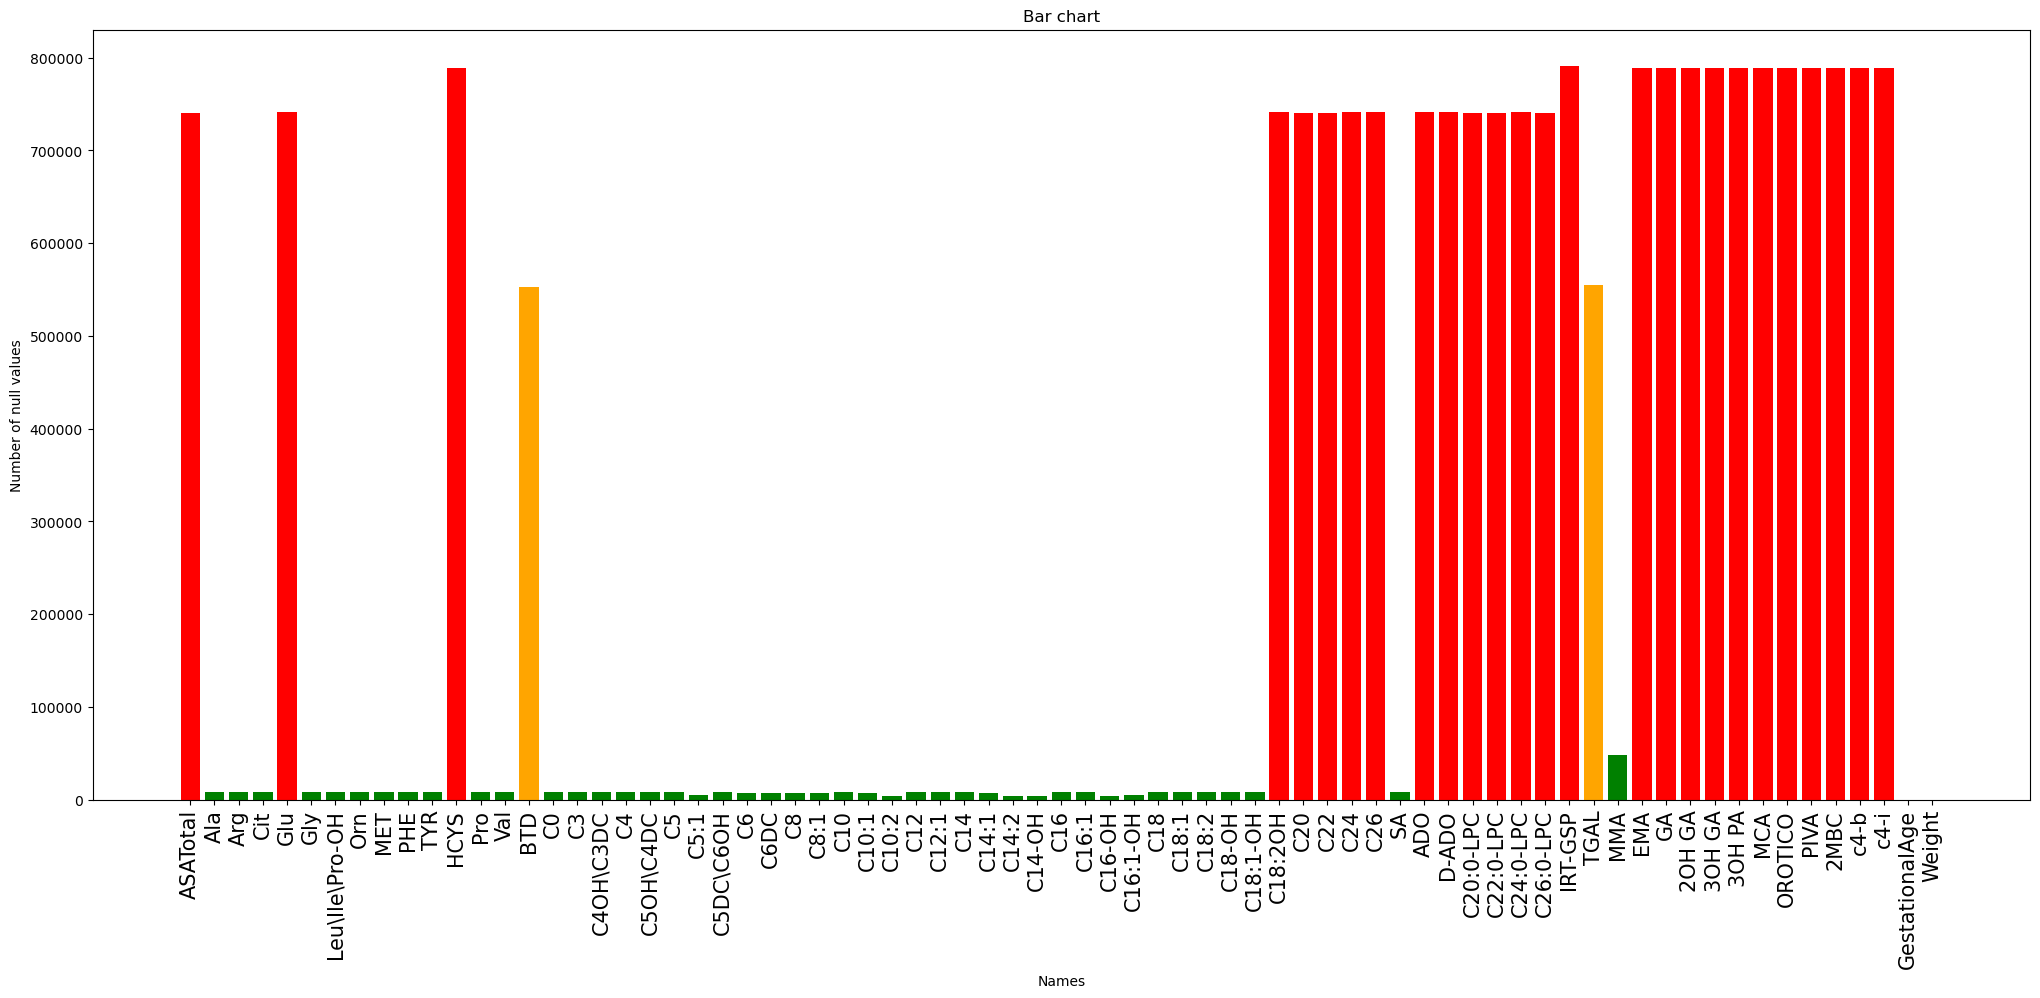

In [211]:
i = 0
x = colonne_numeriche
colors = []
y = []

for val in colonne_numeriche:
    percentage = (babies_def[val].null_count()/babies_def.shape[0])*100
    if percentage > 90:
        colors.append('red')
        i = i+1
    elif percentage > 50:
        colors.append('orange')
    else:
        colors.append('green')
    y.append(babies_def[val].null_count())

plt.figure(figsize=(25, 10))
plt.bar(x, y, color = colors)
plt.xlabel('Names')
plt.ylabel('Number of null values')
plt.title('Bar chart')
plt.xticks(rotation=90, fontsize = 15)

plt.savefig('missing_new.png')
plt.show()

In [231]:

babies_def.filter(pl.col('DIAGNOSI') != 'SANO')[colonne_numeriche].null_count()

shape: (1, 73)
┌──────────┬─────┬─────┬─────┬───┬──────┬──────┬────────────────┬────────┐
│ ASATotal ┆ Ala ┆ Arg ┆ Cit ┆ … ┆ c4-b ┆ c4-i ┆ GestationalAge ┆ Weight │
│ ---      ┆ --- ┆ --- ┆ --- ┆   ┆ ---  ┆ ---  ┆ ---            ┆ ---    │
│ u32      ┆ u32 ┆ u32 ┆ u32 ┆   ┆ u32  ┆ u32  ┆ u32            ┆ u32    │
╞══════════╪═════╪═════╪═════╪═══╪══════╪══════╪════════════════╪════════╡
│ 197      ┆ 0   ┆ 0   ┆ 0   ┆ … ┆ 185  ┆ 185  ┆ 0              ┆ 0      │
└──────────┴─────┴─────┴─────┴───┴──────┴──────┴────────────────┴────────┘

#### Bambini che pesano meno di 1,5 kg

In [55]:
extra_piccoli = babies.filter(pl.col('Weight') < 1500)

In [56]:
extra_piccoli.shape

(8808, 101)

In [57]:
statistics_ppp = extra_piccoli[colonne_numeriche].describe()
iq99 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = extra_piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = extra_piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_ppp = pl.concat([statistics_ppp, more_stat])
statistics_ppp

shape: (13, 74)
┌───────────┬───────────┬───────────┬───────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ statistic ┆ ASATotal  ┆ Ala       ┆ Arg       ┆ … ┆ c4-b     ┆ c4-i      ┆ Gestation ┆ Weight    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---      ┆ ---       ┆ alAge     ┆ ---       │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64      ┆ f64       ┆ ---       ┆ f64       │
│           ┆           ┆           ┆           ┆   ┆          ┆           ┆ f64       ┆           │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ count     ┆ 451.0     ┆ 8801.0    ┆ 8801.0    ┆ … ┆ 44.0     ┆ 44.0      ┆ 8808.0    ┆ 8808.0    │
│ null_coun ┆ 8357.0    ┆ 7.0       ┆ 7.0       ┆ … ┆ 8764.0   ┆ 8764.0    ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│ mean      ┆ 0.366816  ┆ 846.83678 ┆ 100.73146 ┆ … ┆ 0.317637 ┆ 1.068273  ┆ 29.383061 ┆ 1118.9057 │
│           ┆           ┆ 5         ┆ 5         ┆   ┆          ┆           ┆           ┆ 67        │
│ std       ┆ 0.223068  ┆ 16236.564 ┆ 5344.9765 ┆ … ┆ 0.436486 ┆ 5.254236  ┆ 3.010929  ┆ 296.34145 │
│           ┆           ┆ 817       ┆ 02        ┆   ┆          ┆           ┆           ┆           │
│ min       ┆ 0.089     ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.031214 ┆ 0.051908  ┆ 23.0      ┆ 350.0     │
│ 25%       ┆ 0.24      ┆ 190.04    ┆ 12.66     ┆ … ┆ 0.091934 ┆ 0.163239  ┆ 27.0      ┆ 900.0     │
│ 50%       ┆ 0.315     ┆ 252.02    ┆ 23.811    ┆ … ┆ 0.152204 ┆ 0.273215  ┆ 30.0      ┆ 1170.0    │
│ 75%       ┆ 0.44      ┆ 344.02    ┆ 40.27     ┆ … ┆ 0.334111 ┆ 0.388411  ┆ 31.0      ┆ 1385.0    │
│ max       ┆ 2.514     ┆ 793862.70 ┆ 493407.17 ┆ … ┆ 2.280482 ┆ 35.114905 ┆ 41.0      ┆ 1499.0    │
│           ┆           ┆ 5         ┆ 5         ┆   ┆          ┆           ┆           ┆           │
│ 99%       ┆ 1.273     ┆ 1062.64   ┆ 140.92    ┆ … ┆ 2.280482 ┆ 35.114905 ┆ 36.0      ┆ 1495.0    │
│ 1%        ┆ 0.123     ┆ 92.7      ┆ 2.29      ┆ … ┆ 0.031214 ┆ 0.051908  ┆ 23.0      ┆ 440.0     │
│ Kurtosis  ┆ 25.635397 ┆ 1274.4452 ┆ 8251.8853 ┆ … ┆ 8.486126 ┆ 38.954709 ┆ -0.224083 ┆ -0.820937 │
│           ┆           ┆ 62        ┆ 89        ┆   ┆          ┆           ┆           ┆           │
│ Skewness  ┆ 3.811275  ┆ 33.87315  ┆ 89.867113 ┆ … ┆ 2.820727 ┆ 6.396738  ┆ 0.015968  ┆ -0.511791 │
└───────────┴───────────┴───────────┴───────────┴───┴──────────┴───────────┴───────────┴───────────┘

In [58]:
colonne_strane_ppp = []

for col in colonne_numeriche:
    max_ = extra_piccoli[col].max()
    perc = extra_piccoli.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_ppp.append(col)
colonne_strane_ppp

['Ala',
 'Arg',
 'Cit',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'Pro',
 'Val',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5DC\\C6OH',
 'C6',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'SA',
 'D-ADO',
 'MMA']

In [59]:
len(colonne_strane_ppp)

35

In [60]:
for col in colonne_strane_ppp:
    perc = extra_piccoli.select(pl.col(col).quantile(0.99)).item()
    extra_piccoli = extra_piccoli.with_columns(pl.when((pl.col(col) > perc) & (pl.col("DIAGNOSI") == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [61]:
statistics_ppp2 = extra_piccoli[colonne_numeriche].describe()
iq99 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = extra_piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = extra_piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_ppp2 = pl.concat([statistics_ppp2, more_stat])
statistics_ppp2 = statistics_ppp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [62]:
statistics_ppp2

shape: (13, 74)
┌────────────┬──────────┬─────────┬────────┬───┬────────┬────────┬────────────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala     ┆ Arg    ┆ … ┆ c4-b   ┆ c4-i   ┆ GestationalAge ┆ Weight   │
│ ---        ┆ ---      ┆ ---     ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---            ┆ ---      │
│ str        ┆ f64      ┆ f64     ┆ f64    ┆   ┆ f64    ┆ f64    ┆ f64            ┆ f64      │
╞════════════╪══════════╪═════════╪════════╪═══╪════════╪════════╪════════════════╪══════════╡
│ count      ┆ 451.0    ┆ 8713.0  ┆ 8713.0 ┆ … ┆ 44.0   ┆ 44.0   ┆ 8808.0         ┆ 8808.0   │
│ null_count ┆ 8357.0   ┆ 95.0    ┆ 95.0   ┆ … ┆ 8764.0 ┆ 8764.0 ┆ 0.0            ┆ 0.0      │
│ mean       ┆ 0.367    ┆ 283.675 ┆ 28.792 ┆ … ┆ 0.318  ┆ 1.068  ┆ 29.383         ┆ 1118.906 │
│ std        ┆ 0.223    ┆ 140.095 ┆ 21.708 ┆ … ┆ 0.436  ┆ 5.254  ┆ 3.011          ┆ 296.341  │
│ min        ┆ 0.089    ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.031  ┆ 0.052  ┆ 23.0           ┆ 350.0    │
│ 25%        ┆ 0.24     ┆ 189.32  ┆ 12.58  ┆ … ┆ 0.092  ┆ 0.163  ┆ 27.0           ┆ 900.0    │
│ 50%        ┆ 0.315    ┆ 250.9   ┆ 23.55  ┆ … ┆ 0.152  ┆ 0.273  ┆ 30.0           ┆ 1170.0   │
│ 75%        ┆ 0.44     ┆ 340.5   ┆ 39.52  ┆ … ┆ 0.334  ┆ 0.388  ┆ 31.0           ┆ 1385.0   │
│ max        ┆ 2.514    ┆ 1062.64 ┆ 140.92 ┆ … ┆ 2.28   ┆ 35.115 ┆ 41.0           ┆ 1499.0   │
│ 99%        ┆ 1.273    ┆ 810.24  ┆ 104.07 ┆ … ┆ 2.28   ┆ 35.115 ┆ 36.0           ┆ 1495.0   │
│ 1%         ┆ 0.123    ┆ 92.665  ┆ 2.27   ┆ … ┆ 0.031  ┆ 0.052  ┆ 23.0           ┆ 440.0    │
│ Kurtosis   ┆ 25.635   ┆ 4.292   ┆ 2.599  ┆ … ┆ 8.486  ┆ 38.955 ┆ -0.224         ┆ -0.821   │
│ Skewness   ┆ 3.811    ┆ 1.72    ┆ 1.423  ┆ … ┆ 2.821  ┆ 6.397  ┆ 0.016          ┆ -0.512   │
└────────────┴──────────┴─────────┴────────┴───┴────────┴────────┴────────────────┴──────────┘

In [63]:
header = statistics_ppp2["statistic"].to_list()

prova = statistics_ppp2.transpose(include_header=True)

prova.columns = ['Name'] + header
prova[1:]

shape: (73, 14)
┌────────────────┬────────┬────────────┬───────────┬───┬───────────┬────────┬──────────┬──────────┐
│ Name           ┆ count  ┆ null_count ┆ mean      ┆ … ┆ 99%       ┆ 1%     ┆ Kurtosis ┆ Skewness │
│ ---            ┆ ---    ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---    ┆ ---      ┆ ---      │
│ str            ┆ str    ┆ str        ┆ str       ┆   ┆ str       ┆ str    ┆ str      ┆ str      │
╞════════════════╪════════╪════════════╪═══════════╪═══╪═══════════╪════════╪══════════╪══════════╡
│ ASATotal       ┆ 451.0  ┆ 8357.0     ┆ 0.367     ┆ … ┆ 1.273     ┆ 0.123  ┆ 25.635   ┆ 3.811    │
│ Ala            ┆ 8713.0 ┆ 95.0       ┆ 283.675   ┆ … ┆ 810.24    ┆ 92.665 ┆ 4.292    ┆ 1.72     │
│ Arg            ┆ 8713.0 ┆ 95.0       ┆ 28.792    ┆ … ┆ 104.07    ┆ 2.27   ┆ 2.599    ┆ 1.423    │
│ Cit            ┆ 8713.0 ┆ 95.0       ┆ 16.53     ┆ … ┆ 37.59     ┆ 4.72   ┆ 1.174    ┆ 0.927    │
│ Glu            ┆ 451.0  ┆ 8357.0     ┆ 239.181   ┆ … ┆ 506.891   ┆ 86.583 ┆ 0.877    ┆ 0.719    │
│ Gly            ┆ 8713.0 ┆ 95.0       ┆ 441.191   ┆ … ┆ 925.86    ┆ 134.24 ┆ 0.514    ┆ 0.673    │
│ Leu\Ile\Pro-OH ┆ 8713.0 ┆ 95.0       ┆ 220.954   ┆ … ┆ 474.97    ┆ 67.23  ┆ 1.682    ┆ 0.815    │
│ Orn            ┆ 8713.0 ┆ 95.0       ┆ 136.283   ┆ … ┆ 319.39    ┆ 28.62  ┆ 0.401    ┆ 0.752    │
│ MET            ┆ 8713.0 ┆ 95.0       ┆ 34.482    ┆ … ┆ 131.13    ┆ 8.5    ┆ 9.898    ┆ 2.602    │
│ PHE            ┆ 8714.0 ┆ 94.0       ┆ 77.814    ┆ … ┆ 160.68    ┆ 29.99  ┆ 2.498    ┆ 1.029    │
│ TYR            ┆ 8713.0 ┆ 95.0       ┆ 106.071   ┆ … ┆ 544.26    ┆ 9.46   ┆ 11.54    ┆ 3.015    │
│ HCYS           ┆ 44.0   ┆ 8764.0     ┆ 2.163     ┆ … ┆ 6.506     ┆ 0.463  ┆ 2.497    ┆ 1.396    │
│ Pro            ┆ 8713.0 ┆ 95.0       ┆ 196.87    ┆ … ┆ 499.55    ┆ 66.54  ┆ 3.278    ┆ 1.492    │
│ Val            ┆ 8713.0 ┆ 95.0       ┆ 192.852   ┆ … ┆ 389.64    ┆ 57.64  ┆ 0.145    ┆ 0.476    │
│ BTD            ┆ 2234.0 ┆ 6574.0     ┆ 211.044   ┆ … ┆ 354.325   ┆ 74.601 ┆ -0.801   ┆ 0.083    │
│ C0             ┆ 8713.0 ┆ 95.0       ┆ 35.089    ┆ … ┆ 96.22     ┆ 8.17   ┆ 1.239    ┆ 1.185    │
│ C3             ┆ 8715.0 ┆ 93.0       ┆ 2.569     ┆ … ┆ 6.63      ┆ 0.28   ┆ 0.503    ┆ 0.776    │
│ C4OH\C3DC      ┆ 8719.0 ┆ 89.0       ┆ 0.134     ┆ … ┆ 0.32      ┆ 0.03   ┆ 0.733    ┆ 0.907    │
│ C4             ┆ 8715.0 ┆ 93.0       ┆ 0.41      ┆ … ┆ 1.13      ┆ 0.09   ┆ 2.15     ┆ 1.274    │
│ C5OH\C4DC      ┆ 8801.0 ┆ 7.0        ┆ 0.188     ┆ … ┆ 0.43      ┆ 0.07   ┆ 21.686   ┆ 2.607    │
│ C5             ┆ 8801.0 ┆ 7.0        ┆ 0.357     ┆ … ┆ 1.11      ┆ 0.08   ┆ 9.958    ┆ 2.243    │
│ C5:1           ┆ 8801.0 ┆ 7.0        ┆ 0.014     ┆ … ┆ 0.04      ┆ 0.0    ┆ 6.383    ┆ 1.463    │
│ C5DC\C6OH      ┆ 8719.0 ┆ 89.0       ┆ 0.119     ┆ … ┆ 0.26      ┆ 0.04   ┆ 0.897    ┆ 0.84     │
│ C6             ┆ 8717.0 ┆ 91.0       ┆ 0.053     ┆ … ┆ 0.14      ┆ 0.01   ┆ 2.534    ┆ 1.358    │
│ C6DC           ┆ 8801.0 ┆ 7.0        ┆ 0.083     ┆ … ┆ 0.22      ┆ 0.01   ┆ 9.948    ┆ 1.883    │
│ C8             ┆ 8719.0 ┆ 89.0       ┆ 0.081     ┆ … ┆ 0.26      ┆ 0.014  ┆ 3.481    ┆ 1.624    │
│ C8:1           ┆ 8717.0 ┆ 91.0       ┆ 0.087     ┆ … ┆ 0.3       ┆ 0.01   ┆ 2.335    ┆ 1.387    │
│ C10            ┆ 8719.0 ┆ 89.0       ┆ 0.054     ┆ … ┆ 0.16      ┆ 0.01   ┆ 4.555    ┆ 1.56     │
│ C10:1          ┆ 8721.0 ┆ 87.0       ┆ 0.057     ┆ … ┆ 0.21      ┆ 0.01   ┆ 4.853    ┆ 1.976    │
│ C10:2          ┆ 8720.0 ┆ 88.0       ┆ 0.008     ┆ … ┆ 0.04      ┆ 0.0    ┆ 2.195    ┆ 1.446    │
│ C12            ┆ 8801.0 ┆ 7.0        ┆ 0.042     ┆ … ┆ 0.12      ┆ 0.01   ┆ 39.732   ┆ 3.902    │
│ C12:1          ┆ 8801.0 ┆ 7.0        ┆ 0.031     ┆ … ┆ 0.1       ┆ 0.01   ┆ 54.396   ┆ 4.692    │
│ C14            ┆ 8801.0 ┆ 7.0        ┆ 0.148     ┆ … ┆ 0.39      ┆ 0.04   ┆ 3.896    ┆ 1.448    │
│ C14:1          ┆ 8723.0 ┆ 85.0       ┆ 0.062     ┆ … ┆ 0.16      ┆ 0.01   ┆ 3.771    ┆ 1.137    │
│ C14:2          ┆ 8730.0 ┆ 78.0       ┆ 0.026     ┆ … ┆ 0.07      ┆ 0.0    ┆ 29.713

In [64]:
prova_bis = prova['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [65]:
statistics_ppp2_pandas = prova_bis.to_pandas()

# Esporta come tabella LaTeX
statistiche_1500 = statistics_ppp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("extra_piccoli.tex", "w") as f:
    f.write(statistiche_1500)

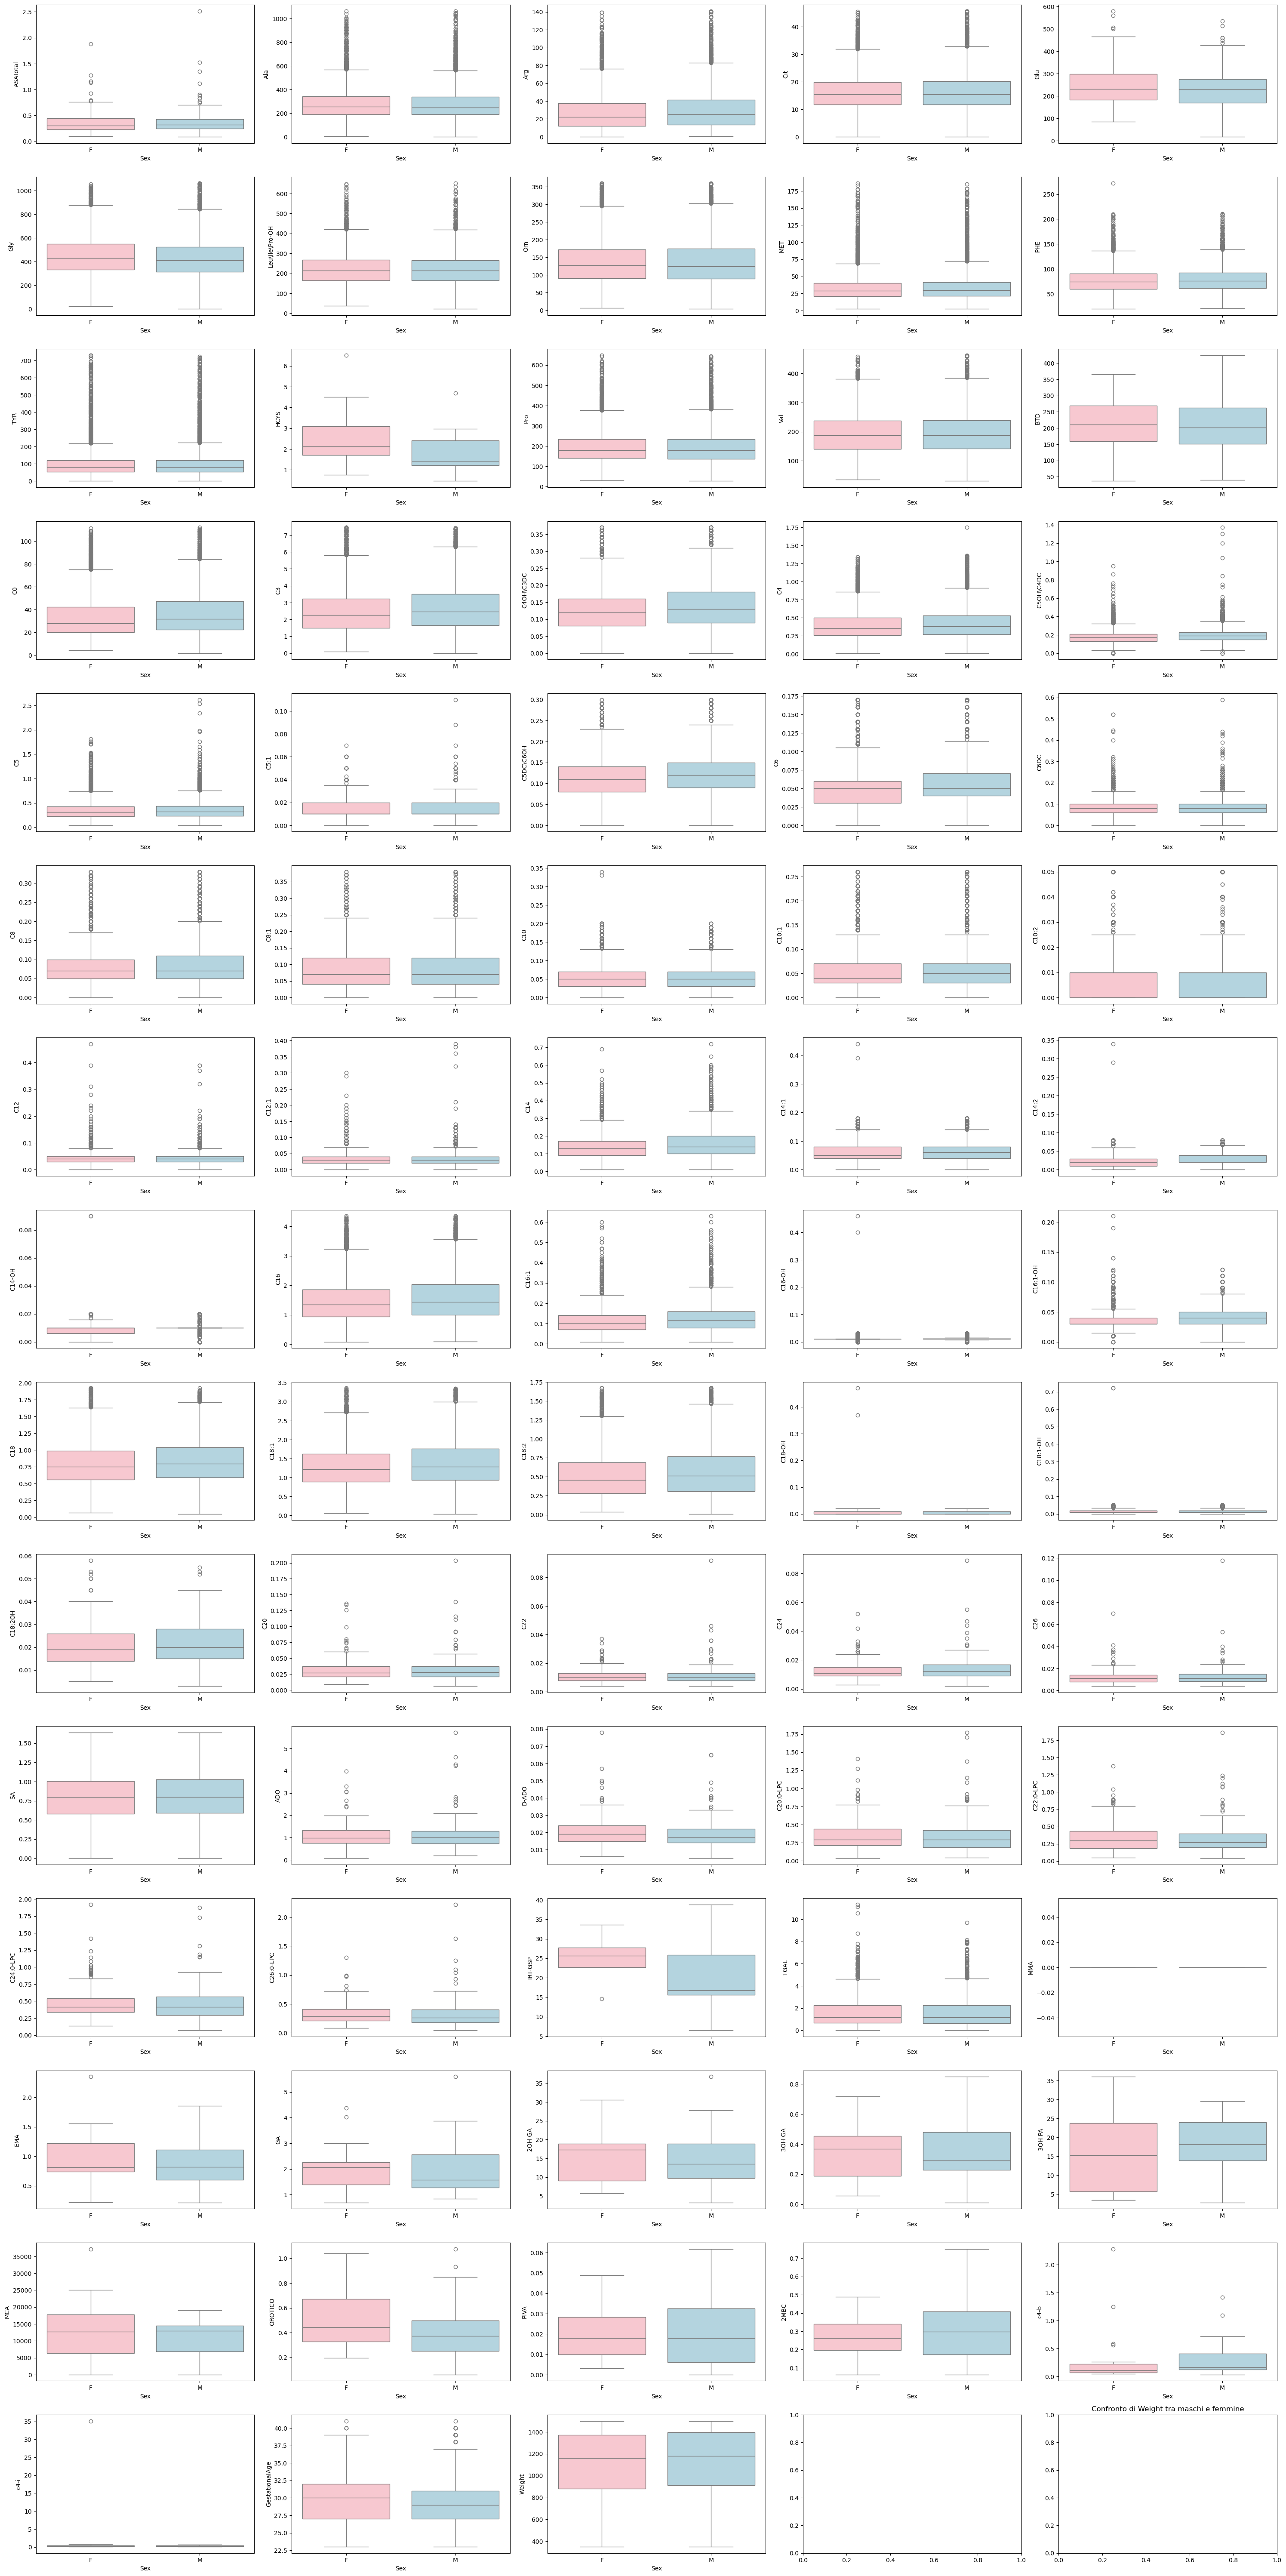

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in extra_piccoli[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=extra_piccoli, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_piccolissimi.png')
plt.tight_layout()

#### Bambini che pesano tra 1,5 r 2 kg

In [81]:
piccoli_pic = babies.filter((pl.col('Weight') >= 1500) & (pl.col('Weight') < 2000))

In [82]:
piccoli_pic.shape

(11942, 101)

In [83]:
statistics_pp = piccoli_pic[colonne_numeriche].describe()
iq99 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli_pic.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli_pic.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_pp = pl.concat([statistics_pp, more_stat])
statistics_pp

shape: (13, 74)
┌────────────┬───────────┬───────────┬───────────┬───┬──────────┬──────────┬───────────┬───────────┐
│ statistic  ┆ ASATotal  ┆ Ala       ┆ Arg       ┆ … ┆ c4-b     ┆ c4-i     ┆ Gestation ┆ Weight    │
│ ---        ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---      ┆ ---      ┆ alAge     ┆ ---       │
│ str        ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64      ┆ f64      ┆ ---       ┆ f64       │
│            ┆           ┆           ┆           ┆   ┆          ┆          ┆ f64       ┆           │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪══════════╪══════════╪═══════════╪═══════════╡
│ count      ┆ 597.0     ┆ 11924.0   ┆ 11924.0   ┆ … ┆ 46.0     ┆ 46.0     ┆ 11942.0   ┆ 11942.0   │
│ null_count ┆ 11345.0   ┆ 18.0      ┆ 18.0      ┆ … ┆ 11896.0  ┆ 11896.0  ┆ 0.0       ┆ 0.0       │
│ mean       ┆ 0.277881  ┆ 366.97122 ┆ 18.978764 ┆ … ┆ 0.280456 ┆ 0.203126 ┆ 33.836543 ┆ 1801.9807 │
│            ┆           ┆ 3         ┆           ┆   ┆          ┆          ┆           ┆ 4         │
│ std        ┆ 0.202481  ┆ 5536.6234 ┆ 87.533387 ┆ … ┆ 0.321173 ┆ 0.121043 ┆ 2.014871  ┆ 132.43832 │
│            ┆           ┆ 05        ┆           ┆   ┆          ┆          ┆           ┆ 8         │
│ min        ┆ 0.08      ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.039109 ┆ 0.039807 ┆ 23.0      ┆ 1500.0    │
│ 25%        ┆ 0.176     ┆ 184.79    ┆ 5.74      ┆ … ┆ 0.086667 ┆ 0.105307 ┆ 32.0      ┆ 1700.0    │
│ 50%        ┆ 0.232     ┆ 238.24    ┆ 10.97     ┆ … ┆ 0.133356 ┆ 0.183026 ┆ 34.0      ┆ 1820.0    │
│ 75%        ┆ 0.307     ┆ 308.04    ┆ 20.91     ┆ … ┆ 0.359565 ┆ 0.235564 ┆ 35.0      ┆ 1920.0    │
│ max        ┆ 1.885     ┆ 384289.65 ┆ 5661.67   ┆ … ┆ 1.237556 ┆ 0.514818 ┆ 41.0      ┆ 1999.0    │
│ 99%        ┆ 1.119     ┆ 668.97    ┆ 83.16     ┆ … ┆ 1.237556 ┆ 0.514818 ┆ 38.0      ┆ 1991.0    │
│ 1%         ┆ 0.094     ┆ 90.56     ┆ 1.06      ┆ … ┆ 0.039109 ┆ 0.039807 ┆ 29.0      ┆ 1520.0    │
│ Kurtosis   ┆ 27.485542 ┆ 3470.7528 ┆ 2186.0953 ┆ … ┆ 1.782011 ┆ 0.229632 ┆ -0.145064 ┆ -0.972601 │
│            ┆           ┆ 01        ┆ 78        ┆   ┆          ┆          ┆           ┆           │
│ Skewness   ┆ 4.486058  ┆ 57.414908 ┆ 42.371484 ┆ … ┆ 1.679867 ┆ 0.985941 ┆ 0.002537  ┆ -0.360445 │
└────────────┴───────────┴───────────┴───────────┴───┴──────────┴──────────┴───────────┴───────────┘

In [84]:
colonne_strane_pp = []

for col in colonne_numeriche:
    max_ = piccoli_pic[col].max()
    perc = piccoli_pic.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_pp.append(col)
colonne_strane_pp

['Ala',
 'Arg',
 'Cit',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'Pro',
 'Val',
 'C0',
 'C3',
 'C4',
 'C5OH\\C4DC',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C10',
 'C10:1',
 'C14-OH',
 'C16',
 'C16-OH',
 'C18',
 'C18:1',
 'C18:2',
 'SA',
 'TGAL',
 'MMA']

In [85]:
len(colonne_strane_pp)

31

In [86]:
for col in colonne_strane_pp:
    perc = piccoli_pic.select(pl.col(col).quantile(0.99)).item()
    piccoli_pic = piccoli_pic.with_columns(pl.when((pl.col(col) > perc) & (pl.col('DIAGNOSI') == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [87]:
statistics_pp2 = piccoli_pic[colonne_numeriche].describe()
iq99 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli_pic.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli_pic.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_pp2 = pl.concat([statistics_pp2, more_stat])
statistics_pp2 = statistics_pp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [88]:
header = statistics_pp2["statistic"].to_list()

prova2 = statistics_pp2.transpose(include_header=True)

prova2.columns = ['Name'] + header
prova2[1:]

shape: (73, 14)
┌───────────────┬─────────┬────────────┬───────────┬───┬───────────┬─────────┬──────────┬──────────┐
│ Name          ┆ count   ┆ null_count ┆ mean      ┆ … ┆ 99%       ┆ 1%      ┆ Kurtosis ┆ Skewness │
│ ---           ┆ ---     ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---     ┆ ---      ┆ ---      │
│ str           ┆ str     ┆ str        ┆ str       ┆   ┆ str       ┆ str     ┆ str      ┆ str      │
╞═══════════════╪═════════╪════════════╪═══════════╪═══╪═══════════╪═════════╪══════════╪══════════╡
│ ASATotal      ┆ 597.0   ┆ 11345.0    ┆ 0.278     ┆ … ┆ 1.119     ┆ 0.094   ┆ 27.486   ┆ 4.486    │
│ Ala           ┆ 11805.0 ┆ 137.0      ┆ 254.108   ┆ … ┆ 562.519   ┆ 90.47   ┆ 1.274    ┆ 0.999    │
│ Arg           ┆ 11805.0 ┆ 137.0      ┆ 15.491    ┆ … ┆ 67.36     ┆ 1.05    ┆ 3.587    ┆ 1.801    │
│ Cit           ┆ 11806.0 ┆ 136.0      ┆ 14.488    ┆ … ┆ 32.46     ┆ 4.18    ┆ 0.914    ┆ 0.874    │
│ Glu           ┆ 597.0   ┆ 11345.0    ┆ 242.465   ┆ … ┆ 497.136   ┆ 108.938 ┆ 2.191    ┆ 1.066    │
│ Gly           ┆ 11805.0 ┆ 137.0      ┆ 401.219   ┆ … ┆ 830.19    ┆ 123.48  ┆ 0.619    ┆ 0.659    │
│ Leu\Ile\Pro-O ┆ 11805.0 ┆ 137.0      ┆ 161.353   ┆ … ┆ 343.91    ┆ 62.78   ┆ 0.59     ┆ 0.882    │
│ H             ┆         ┆            ┆           ┆   ┆           ┆         ┆          ┆          │
│ Orn           ┆ 11805.0 ┆ 137.0      ┆ 109.163   ┆ … ┆ 273.9     ┆ 28.26   ┆ 1.001    ┆ 1.034    │
│ MET           ┆ 11805.0 ┆ 137.0      ┆ 24.56     ┆ … ┆ 61.63     ┆ 8.12    ┆ 2.453    ┆ 1.282    │
│ PHE           ┆ 11805.0 ┆ 137.0      ┆ 61.362    ┆ … ┆ 121.45    ┆ 28.57   ┆ 1.099    ┆ 0.923    │
│ TYR           ┆ 11805.0 ┆ 137.0      ┆ 100.2     ┆ … ┆ 290.347   ┆ 22.98   ┆ 2.96     ┆ 1.489    │
│ HCYS          ┆ 46.0    ┆ 11896.0    ┆ 2.16      ┆ … ┆ 6.982     ┆ 0.701   ┆ 3.848    ┆ 1.746    │
│ Pro           ┆ 11805.0 ┆ 137.0      ┆ 161.819   ┆ … ┆ 329.52    ┆ 63.6    ┆ 0.914    ┆ 0.828    │
│ Val           ┆ 11805.0 ┆ 137.0      ┆ 131.518   ┆ … ┆ 306.12    ┆ 45.122  ┆ 0.657    ┆ 1.007    │
│ BTD           ┆ 3025.0  ┆ 8917.0     ┆ 212.223   ┆ … ┆ 347.452   ┆ 87.177  ┆ -0.653   ┆ 0.138    │
│ C0            ┆ 11805.0 ┆ 137.0      ┆ 27.448    ┆ … ┆ 69.26     ┆ 9.76    ┆ 1.767    ┆ 1.284    │
│ C3            ┆ 11805.0 ┆ 137.0      ┆ 2.244     ┆ … ┆ 5.85      ┆ 0.35    ┆ 0.721    ┆ 0.885    │
│ C4OH\C3DC     ┆ 11924.0 ┆ 18.0       ┆ 0.11      ┆ … ┆ 0.3       ┆ 0.03    ┆ 8.879    ┆ 1.908    │
│ C4            ┆ 11807.0 ┆ 135.0      ┆ 0.278     ┆ … ┆ 0.77      ┆ 0.08    ┆ 2.805    ┆ 1.483    │
│ C5OH\C4DC     ┆ 11809.0 ┆ 133.0      ┆ 0.17      ┆ … ┆ 0.33      ┆ 0.07    ┆ 0.61     ┆ 0.638    │
│ C5            ┆ 11924.0 ┆ 18.0       ┆ 0.209     ┆ … ┆ 0.65      ┆ 0.07    ┆ 9.222    ┆ 2.299    │
│ C5:1          ┆ 11864.0 ┆ 78.0       ┆ 0.01      ┆ … ┆ 0.03      ┆ 0.0     ┆ 1.427    ┆ 0.465    │
│ C5DC\C6OH     ┆ 11805.0 ┆ 137.0      ┆ 0.106     ┆ … ┆ 0.22      ┆ 0.04    ┆ 0.587    ┆ 0.729    │
│ C6            ┆ 11847.0 ┆ 95.0       ┆ 0.045     ┆ … ┆ 0.11      ┆ 0.01    ┆ 1.303    ┆ 0.963    │
│ C6DC          ┆ 11808.0 ┆ 134.0      ┆ 0.084     ┆ … ┆ 0.19      ┆ 0.013   ┆ 0.38     ┆ 0.654    │
│ C8            ┆ 11813.0 ┆ 129.0      ┆ 0.055     ┆ … ┆ 0.14      ┆ 0.01    ┆ 1.538    ┆ 1.069    │
│ C8:1          ┆ 11924.0 ┆ 18.0       ┆ 0.07      ┆ … ┆ 0.25      ┆ 0.01    ┆ 7.474    ┆ 2.054    │
│ C10           ┆ 11806.0 ┆ 136.0      ┆ 0.056     ┆ … ┆ 0.15      ┆ 0.01    ┆ 1.422    ┆ 1.116    │
│ C10:1         ┆ 11819.0 ┆ 123.0      ┆ 0.048     ┆ … ┆ 0.12      ┆ 0.01    ┆ 1.29     ┆ 0.955    │
│ C10:2         ┆ 11924.0 ┆ 18.0       ┆ 0.005     ┆ … ┆ 0.03      ┆ 0.0     ┆ 13.765   ┆ 2.261    │
│ C12           ┆ 11924.0 ┆ 18.0       ┆ 0.06      ┆ … ┆ 0.18      ┆ 0.02    ┆ 14.119   ┆ 2.573    │
│ C12:1         ┆ 11924.0 ┆ 18.0       ┆ 0.04      ┆ … ┆ 0.14      ┆ 0.01    ┆ 24.091   ┆ 3.331    │
│ C14           ┆ 11924.0 ┆ 18.0       ┆ 0.186     ┆ … ┆ 0.44      ┆ 0.05    ┆ 2.143    ┆ 1.011    │
│ C14:1         ┆ 11924.0 ┆ 18.0       ┆ 0.07

In [89]:
unoemezzodue = prova2['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [90]:
statistics_pp2_pandas = unoemezzodue.to_pandas()

# Esporta come tabella LaTeX
statistiche_2000 = statistics_pp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("unoemezzodue_table.tex", "w") as f:
    f.write(statistiche_2000)

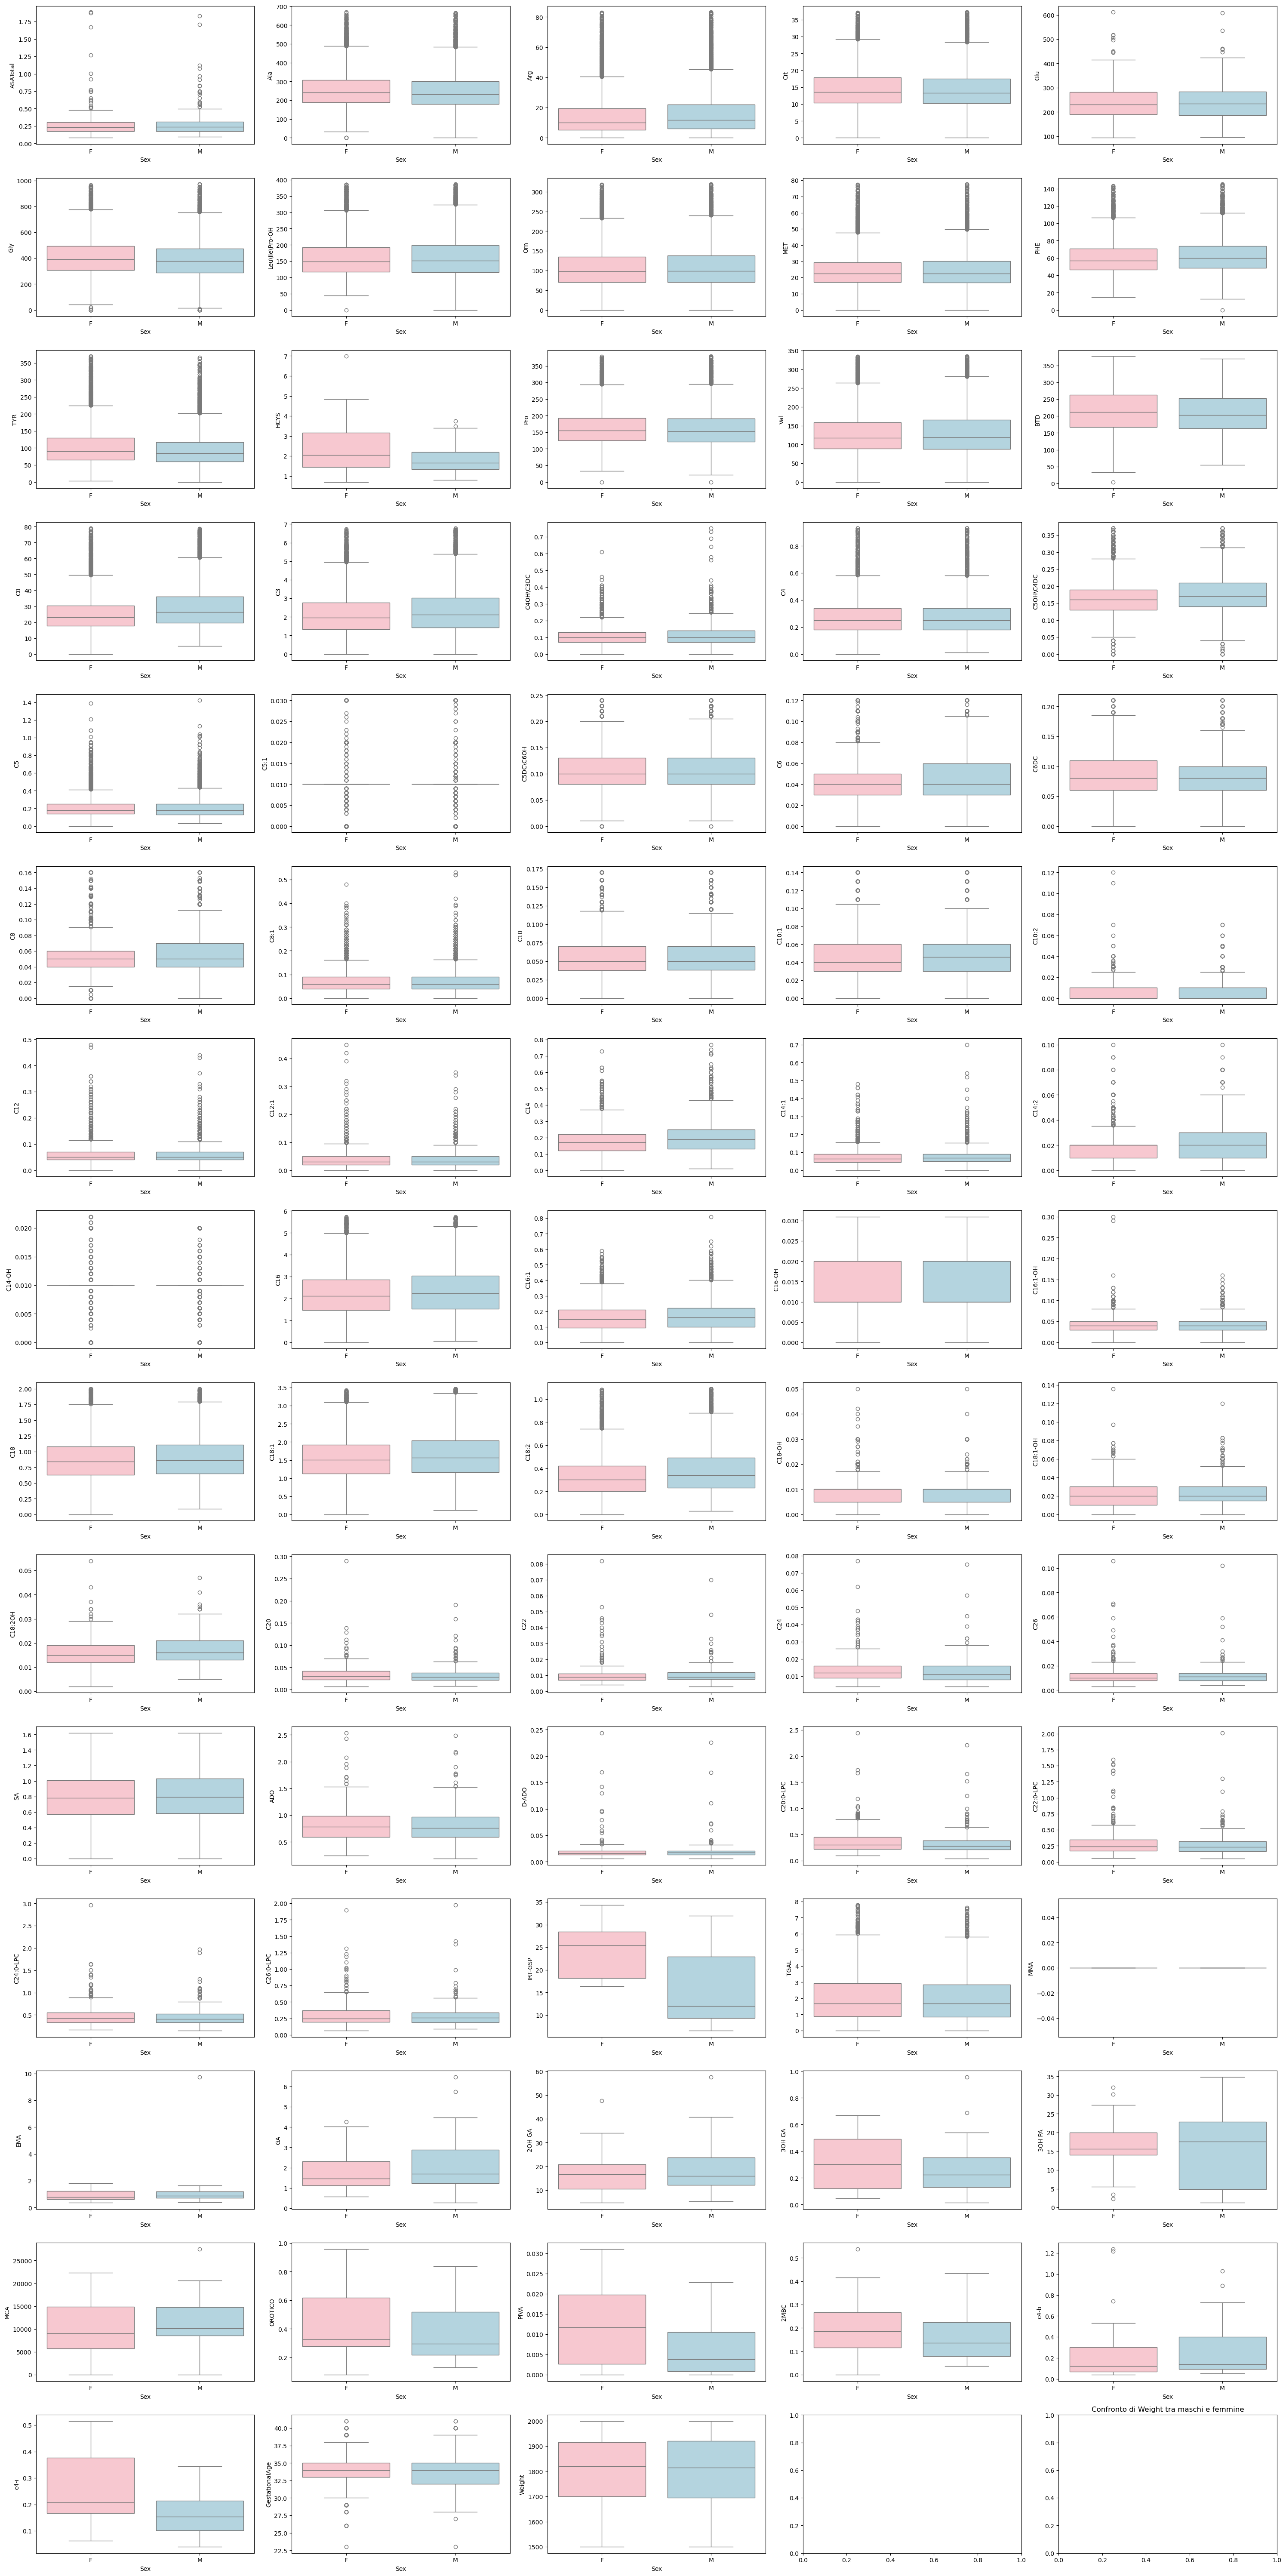

In [91]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in piccoli_pic[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccoli_pic, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_piccoli.png')
plt.tight_layout()

#### Bambini che pesano meno di 2,5 kg

In [93]:
piccoli = babies.filter((pl.col('Weight') <= 2500) & (pl.col('Weight') > 2000))

In [94]:
piccoli.shape

(42252, 101)

In [95]:
statistics_p = piccoli[colonne_numeriche].describe()
iq99 = piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_p = pl.concat([statistics_p, more_stat])
statistics_p

shape: (13, 74)
┌───────────┬───────────┬───────────┬───────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ statistic ┆ ASATotal  ┆ Ala       ┆ Arg       ┆ … ┆ c4-b     ┆ c4-i      ┆ Gestation ┆ Weight    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---      ┆ ---       ┆ alAge     ┆ ---       │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64      ┆ f64       ┆ ---       ┆ f64       │
│           ┆           ┆           ┆           ┆   ┆          ┆           ┆ f64       ┆           │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ count     ┆ 2485.0    ┆ 42223.0   ┆ 42223.0   ┆ … ┆ 165.0    ┆ 165.0     ┆ 42252.0   ┆ 42252.0   │
│ null_coun ┆ 39767.0   ┆ 29.0      ┆ 29.0      ┆ … ┆ 42087.0  ┆ 42087.0   ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│ mean      ┆ 0.267279  ┆ 325.72451 ┆ 11.865637 ┆ … ┆ 0.161063 ┆ 0.151264  ┆ 36.397259 ┆ 2311.0247 │
│           ┆           ┆ 2         ┆           ┆   ┆          ┆           ┆           ┆ 33        │
│ std       ┆ 0.176566  ┆ 4293.6053 ┆ 58.89509  ┆ … ┆ 0.197649 ┆ 0.091519  ┆ 1.791259  ┆ 138.36688 │
│           ┆           ┆ 87        ┆           ┆   ┆          ┆           ┆           ┆ 8         │
│ min       ┆ 0.05      ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.02093  ┆ 0.00718   ┆ 25.0      ┆ 2001.0    │
│ 25%       ┆ 0.175     ┆ 197.42    ┆ 4.7       ┆ … ┆ 0.063938 ┆ 0.094541  ┆ 35.0      ┆ 2205.0    │
│ 50%       ┆ 0.231     ┆ 246.25    ┆ 8.26      ┆ … ┆ 0.097047 ┆ 0.13424   ┆ 37.0      ┆ 2335.0    │
│ 75%       ┆ 0.304     ┆ 307.08    ┆ 13.9      ┆ … ┆ 0.155173 ┆ 0.178921  ┆ 38.0      ┆ 2430.0    │
│ max       ┆ 2.692     ┆ 445301.98 ┆ 6355.63   ┆ … ┆ 1.207515 ┆ 0.759897  ┆ 42.0      ┆ 2500.0    │
│ 99%       ┆ 1.093     ┆ 576.86    ┆ 48.15     ┆ … ┆ 0.971517 ┆ 0.40699   ┆ 40.0      ┆ 2500.0    │
│ 1%        ┆ 0.091     ┆ 108.89    ┆ 1.02      ┆ … ┆ 0.026949 ┆ 0.031878  ┆ 32.0      ┆ 2016.0    │
│ Kurtosis  ┆ 36.280432 ┆ 5774.9256 ┆ 6601.2423 ┆ … ┆ 9.928642 ┆ 13.055828 ┆ -0.146109 ┆ -0.903079 │
│           ┆           ┆ 54        ┆ 74        ┆   ┆          ┆           ┆           ┆           │
│ Skewness  ┆ 4.690303  ┆ 73.159702 ┆ 75.166562 ┆ … ┆ 3.074793 ┆ 2.729506  ┆ -0.189849 ┆ -0.462141 │
└───────────┴───────────┴───────────┴───────────┴───┴──────────┴───────────┴───────────┴───────────┘

In [96]:
colonne_strane_p = []

for col in colonne_numeriche:
    max_ = piccoli[col].max()
    perc = piccoli.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_p.append(col)
colonne_strane_p

['Ala',
 'Arg',
 'Cit',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'Pro',
 'Val',
 'C0',
 'C3',
 'C4',
 'C5OH\\C4DC',
 'C5:1',
 'C5DC\\C6OH',
 'C6DC',
 'C8',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18-OH',
 'C18:1-OH',
 'SA',
 'MMA',
 'EMA',
 'OROTICO',
 'PIVA']

In [97]:
for col in colonne_strane_p:
    perc = piccoli.select(pl.col(col).quantile(0.99)).item()
    piccoli = piccoli.with_columns(pl.when((pl.col(col) > perc) & (pl.col('DIAGNOSI') == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [98]:
statistics_p2 = piccoli[colonne_numeriche].describe()
iq99 = piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_p2 = pl.concat([statistics_p2, more_stat])
statistics_p2 = statistics_p2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_p2

shape: (13, 74)
┌────────────┬──────────┬─────────┬─────────┬───┬─────────┬─────────┬────────────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala     ┆ Arg     ┆ … ┆ c4-b    ┆ c4-i    ┆ GestationalAge ┆ Weight   │
│ ---        ┆ ---      ┆ ---     ┆ ---     ┆   ┆ ---     ┆ ---     ┆ ---            ┆ ---      │
│ str        ┆ f64      ┆ f64     ┆ f64     ┆   ┆ f64     ┆ f64     ┆ f64            ┆ f64      │
╞════════════╪══════════╪═════════╪═════════╪═══╪═════════╪═════════╪════════════════╪══════════╡
│ count      ┆ 2485.0   ┆ 41801.0 ┆ 41801.0 ┆ … ┆ 165.0   ┆ 165.0   ┆ 42252.0        ┆ 42252.0  │
│ null_count ┆ 39767.0  ┆ 451.0   ┆ 451.0   ┆ … ┆ 42087.0 ┆ 42087.0 ┆ 0.0            ┆ 0.0      │
│ mean       ┆ 0.267    ┆ 257.404 ┆ 10.374  ┆ … ┆ 0.161   ┆ 0.151   ┆ 36.397         ┆ 2311.025 │
│ std        ┆ 0.177    ┆ 84.608  ┆ 7.987   ┆ … ┆ 0.198   ┆ 0.092   ┆ 1.791          ┆ 138.367  │
│ min        ┆ 0.05     ┆ 0.0     ┆ 0.0     ┆ … ┆ 0.021   ┆ 0.007   ┆ 25.0           ┆ 2001.0   │
│ 25%        ┆ 0.175    ┆ 196.94  ┆ 4.67    ┆ … ┆ 0.064   ┆ 0.095   ┆ 35.0           ┆ 2205.0   │
│ 50%        ┆ 0.231    ┆ 245.27  ┆ 8.18    ┆ … ┆ 0.097   ┆ 0.134   ┆ 37.0           ┆ 2335.0   │
│ 75%        ┆ 0.304    ┆ 304.8   ┆ 13.646  ┆ … ┆ 0.155   ┆ 0.179   ┆ 38.0           ┆ 2430.0   │
│ max        ┆ 2.692    ┆ 576.86  ┆ 48.15   ┆ … ┆ 1.208   ┆ 0.76    ┆ 42.0           ┆ 2500.0   │
│ 99%        ┆ 1.093    ┆ 508.48  ┆ 38.655  ┆ … ┆ 0.972   ┆ 0.407   ┆ 40.0           ┆ 2500.0   │
│ 1%         ┆ 0.091    ┆ 108.73  ┆ 1.02    ┆ … ┆ 0.027   ┆ 0.032   ┆ 32.0           ┆ 2016.0   │
│ Kurtosis   ┆ 36.28    ┆ 0.685   ┆ 2.935   ┆ … ┆ 9.929   ┆ 13.056  ┆ -0.146         ┆ -0.903   │
│ Skewness   ┆ 4.69     ┆ 0.766   ┆ 1.593   ┆ … ┆ 3.075   ┆ 2.73    ┆ -0.19          ┆ -0.462   │
└────────────┴──────────┴─────────┴─────────┴───┴─────────┴─────────┴────────────────┴──────────┘

In [99]:
header = statistics_p2["statistic"].to_list()

prova3 = statistics_p2.transpose(include_header=True)

prova3.columns = ['Name'] + header
prova3[1:]

shape: (73, 14)
┌───────────────┬─────────┬────────────┬───────────┬───┬───────────┬────────┬───────────┬──────────┐
│ Name          ┆ count   ┆ null_count ┆ mean      ┆ … ┆ 99%       ┆ 1%     ┆ Kurtosis  ┆ Skewness │
│ ---           ┆ ---     ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---    ┆ ---       ┆ ---      │
│ str           ┆ str     ┆ str        ┆ str       ┆   ┆ str       ┆ str    ┆ str       ┆ str      │
╞═══════════════╪═════════╪════════════╪═══════════╪═══╪═══════════╪════════╪═══════════╪══════════╡
│ ASATotal      ┆ 2485.0  ┆ 39767.0    ┆ 0.267     ┆ … ┆ 1.093     ┆ 0.091  ┆ 36.28     ┆ 4.69     │
│ Ala           ┆ 41801.0 ┆ 451.0      ┆ 257.404   ┆ … ┆ 508.48    ┆ 108.73 ┆ 0.685     ┆ 0.766    │
│ Arg           ┆ 41801.0 ┆ 451.0      ┆ 10.374    ┆ … ┆ 38.655    ┆ 1.02   ┆ 2.935     ┆ 1.593    │
│ Cit           ┆ 41803.0 ┆ 449.0      ┆ 13.326    ┆ … ┆ 28.21     ┆ 3.96   ┆ 15.423    ┆ 1.323    │
│ Glu           ┆ 2485.0  ┆ 39767.0    ┆ 243.188   ┆ … ┆ 466.796   ┆ 117.3  ┆ 2.403     ┆ 1.093    │
│ Gly           ┆ 41801.0 ┆ 451.0      ┆ 419.61    ┆ … ┆ 814.28    ┆ 138.66 ┆ 0.429     ┆ 0.527    │
│ Leu\Ile\Pro-O ┆ 41801.0 ┆ 451.0      ┆ 140.452   ┆ … ┆ 258.68    ┆ 70.6   ┆ 0.795     ┆ 0.817    │
│ H             ┆         ┆            ┆           ┆   ┆           ┆        ┆           ┆          │
│ Orn           ┆ 41801.0 ┆ 451.0      ┆ 102.675   ┆ … ┆ 238.53    ┆ 35.55  ┆ 1.322     ┆ 1.054    │
│ MET           ┆ 41801.0 ┆ 451.0      ┆ 20.872    ┆ … ┆ 41.07     ┆ 8.62   ┆ 0.773     ┆ 0.74     │
│ PHE           ┆ 41807.0 ┆ 445.0      ┆ 55.187    ┆ … ┆ 94.06     ┆ 29.87  ┆ 49.164    ┆ 2.188    │
│ TYR           ┆ 41802.0 ┆ 450.0      ┆ 105.299   ┆ … ┆ 271.12    ┆ 35.39  ┆ 2171.354  ┆ 23.151   │
│ HCYS          ┆ 165.0   ┆ 42087.0    ┆ 3.052     ┆ … ┆ 10.313    ┆ 0.813  ┆ 66.974    ┆ 7.058    │
│ Pro           ┆ 41802.0 ┆ 450.0      ┆ 177.521   ┆ … ┆ 309.25    ┆ 78.739 ┆ 41545.952 ┆ 203.526  │
│ Val           ┆ 41801.0 ┆ 451.0      ┆ 116.575   ┆ … ┆ 226.53    ┆ 52.22  ┆ 0.8       ┆ 0.806    │
│ BTD           ┆ 11801.0 ┆ 30451.0    ┆ 220.823   ┆ … ┆ 343.633   ┆ 96.356 ┆ -0.59     ┆ -0.008   │
│ C0            ┆ 41801.0 ┆ 451.0      ┆ 22.375    ┆ … ┆ 51.99     ┆ 8.26   ┆ 1.288     ┆ 1.073    │
│ C3            ┆ 41806.0 ┆ 446.0      ┆ 2.027     ┆ … ┆ 4.98      ┆ 0.42   ┆ 1.565     ┆ 0.957    │
│ C4OH\C3DC     ┆ 42223.0 ┆ 29.0       ┆ 0.147     ┆ … ┆ 0.4       ┆ 0.04   ┆ 3.712     ┆ 1.422    │
│ C4            ┆ 41812.0 ┆ 440.0      ┆ 0.251     ┆ … ┆ 0.66      ┆ 0.07   ┆ 2.263     ┆ 1.33     │
│ C5OH\C4DC     ┆ 41850.0 ┆ 402.0      ┆ 0.182     ┆ … ┆ 0.35      ┆ 0.07   ┆ 0.446     ┆ 0.579    │
│ C5            ┆ 42223.0 ┆ 29.0       ┆ 0.146     ┆ … ┆ 0.4       ┆ 0.05   ┆ 15.638    ┆ 2.604    │
│ C5:1          ┆ 41998.0 ┆ 254.0      ┆ 0.009     ┆ … ┆ 0.023     ┆ 0.0    ┆ 1.859     ┆ 0.393    │
│ C5DC\C6OH     ┆ 41879.0 ┆ 373.0      ┆ 0.117     ┆ … ┆ 0.236     ┆ 0.04   ┆ 0.436     ┆ 0.641    │
│ C6            ┆ 42223.0 ┆ 29.0       ┆ 0.046     ┆ … ┆ 0.11      ┆ 0.01   ┆ 9.533     ┆ 1.774    │
│ C6DC          ┆ 41894.0 ┆ 358.0      ┆ 0.106     ┆ … ┆ 0.23      ┆ 0.02   ┆ 0.203     ┆ 0.532    │
│ C8            ┆ 41822.0 ┆ 430.0      ┆ 0.06      ┆ … ┆ 0.15      ┆ 0.02   ┆ 1.738     ┆ 1.102    │
│ C8:1          ┆ 42223.0 ┆ 29.0       ┆ 0.06      ┆ … ┆ 0.21      ┆ 0.01   ┆ 11.047    ┆ 2.394    │
│ C10           ┆ 41830.0 ┆ 422.0      ┆ 0.081     ┆ … ┆ 0.212     ┆ 0.02   ┆ 1.724     ┆ 1.175    │
│ C10:1         ┆ 41818.0 ┆ 434.0      ┆ 0.054     ┆ … ┆ 0.11      ┆ 0.02   ┆ 0.444     ┆ 0.585    │
│ C10:2         ┆ 41942.0 ┆ 310.0      ┆ 0.004     ┆ … ┆ 0.02      ┆ 0.0    ┆ 0.19      ┆ 1.049    │
│ C12           ┆ 41812.0 ┆ 440.0      ┆ 0.095     ┆ … ┆ 0.28      ┆ 0.02   ┆ 2.595     ┆ 1.461    │
│ C12:1         ┆ 42223.0 ┆ 29.0       ┆ 0.067     ┆ … ┆ 0.26      ┆ 0.01   ┆ 15.242    ┆ 2.857    │
│ C14           ┆ 41839.0 ┆ 413.0      ┆ 0.216     ┆ … ┆ 0.45      ┆ 0.05   ┆ 0.257     ┆ 0.587    │
│ C14:1         ┆ 41804.0 ┆ 448.0      ┆ 0.10

In [100]:
duemezzo = prova3['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [101]:
statistics_p2_pandas = duemezzo.to_pandas()
# Esporta come tabella LaTeX
statistiche_2500 = statistics_p2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("duemezzo_table.tex", "w") as f:
    f.write(statistiche_2500)

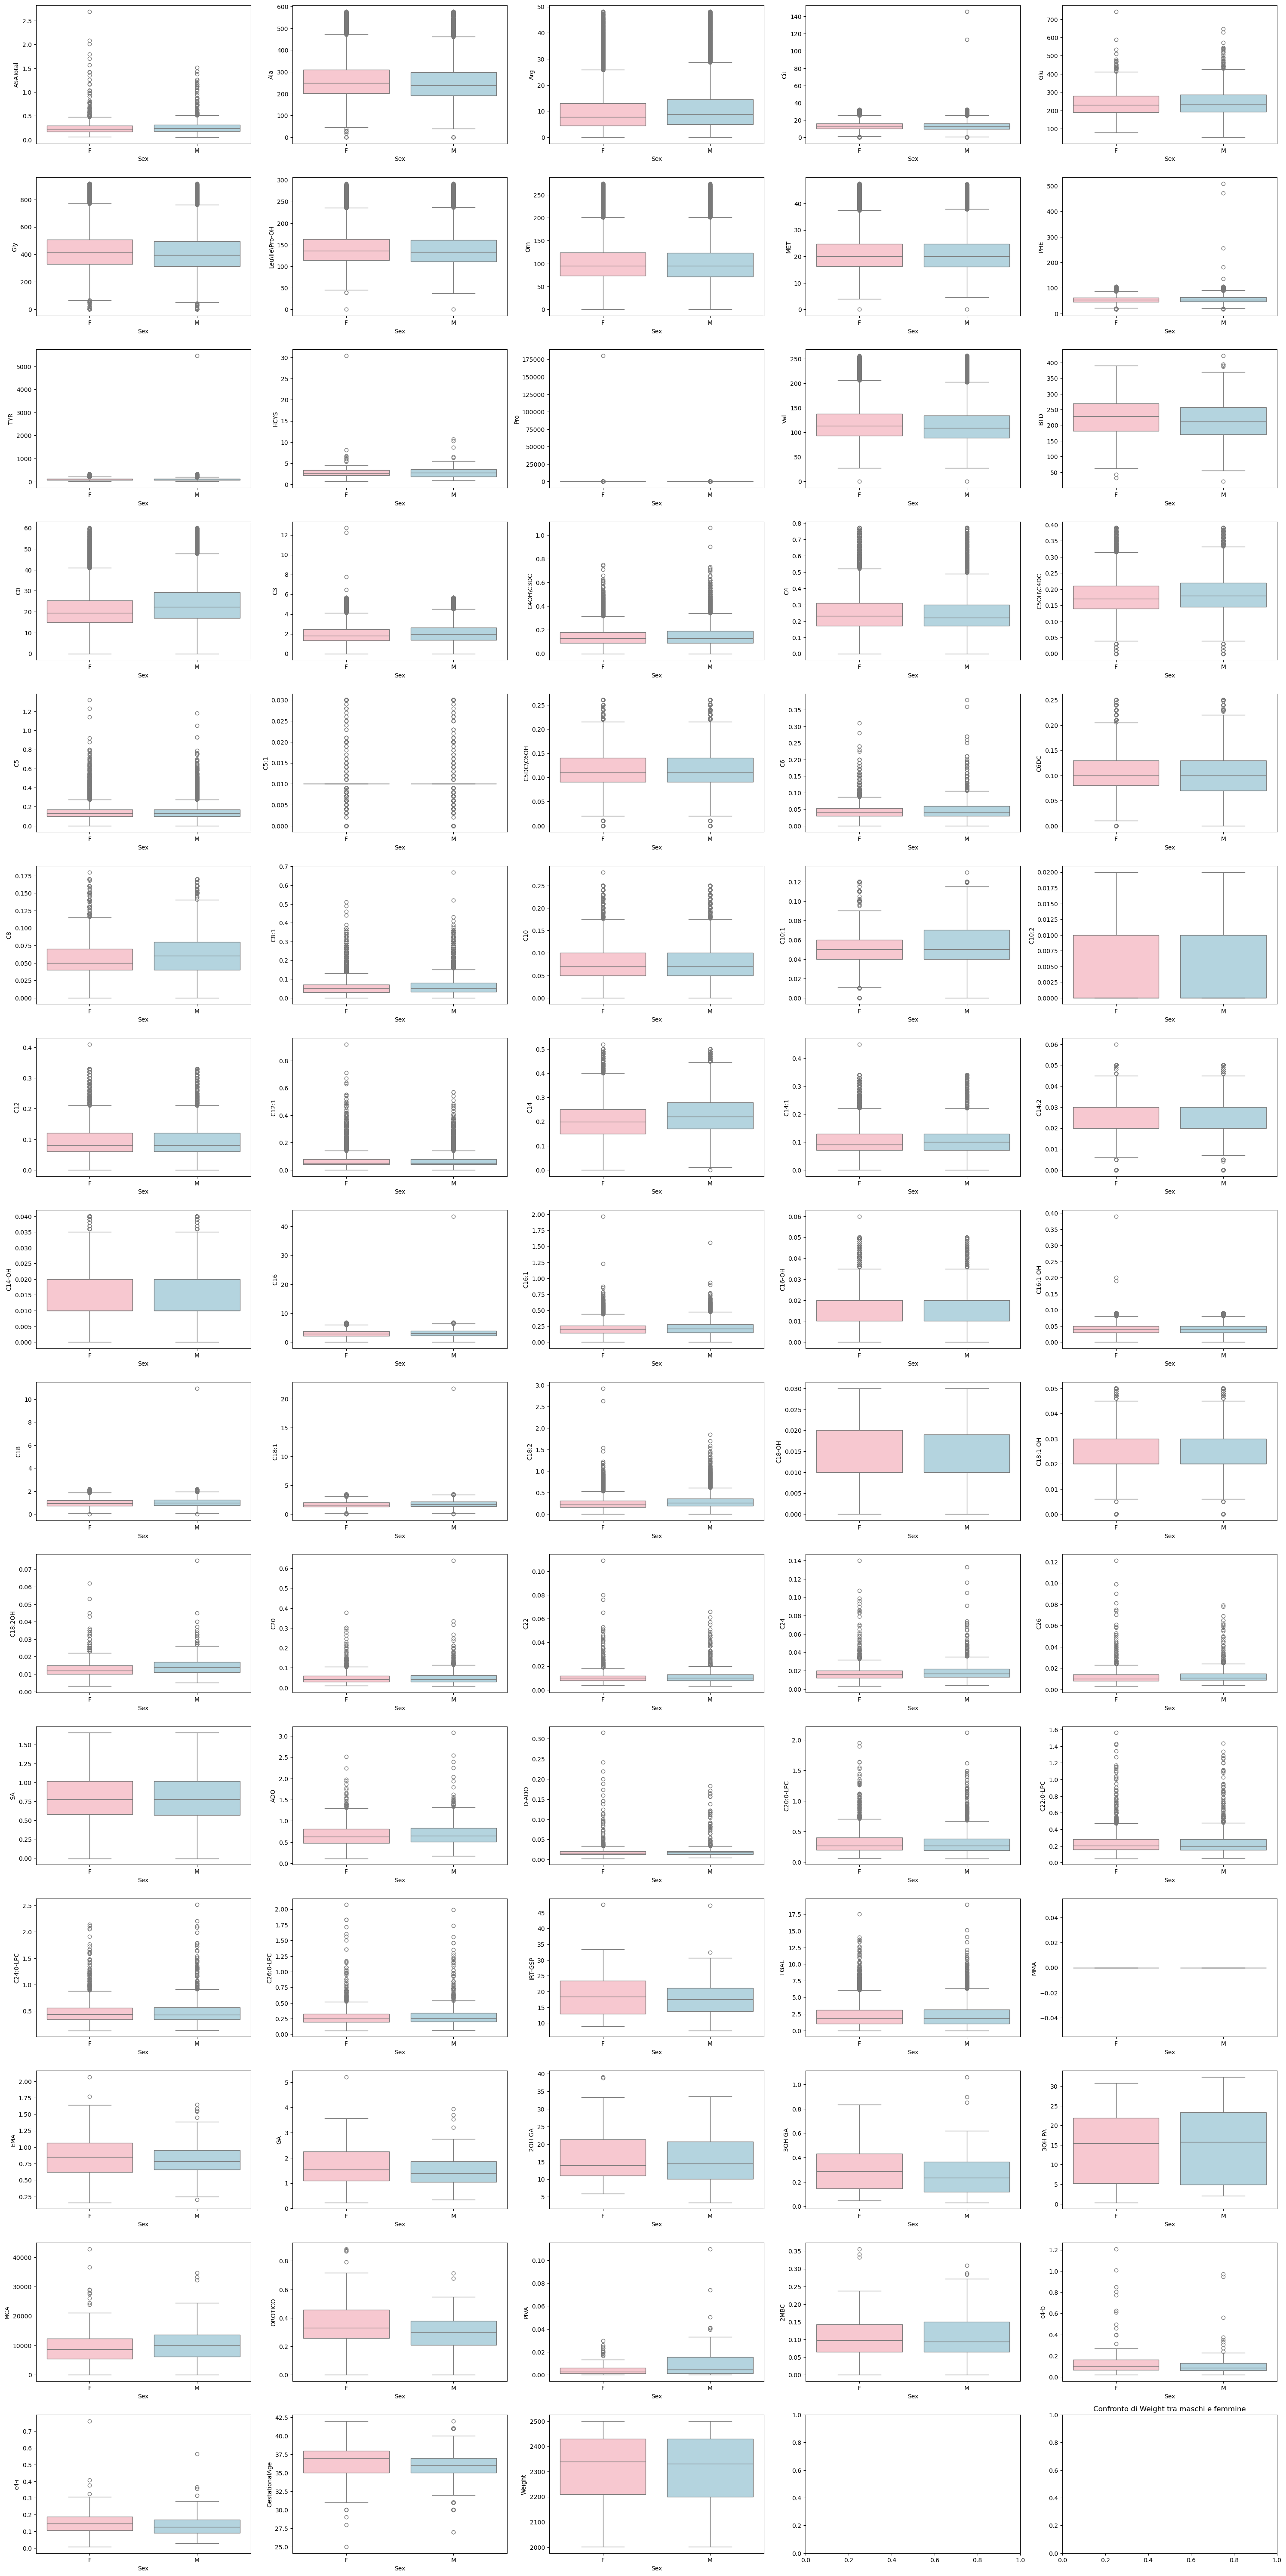

In [102]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in piccoli[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccoli, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_medi.png')
plt.tight_layout()

#### Bambini che pesano più di 2,5 kg

In [104]:
ciccioni = babies.filter(pl.col('Weight') > 2500)

In [105]:
ciccioni.shape

(728235, 101)

In [106]:
statistics_c = ciccioni[colonne_numeriche].describe()
iq99 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = ciccioni.select(pl.col(colonne_numeriche).kurtosis())
ske = ciccioni.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_c = pl.concat([statistics_c, more_stat])
statistics_c

shape: (13, 74)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ ASATotal  ┆ Ala       ┆ Arg       ┆ … ┆ c4-b      ┆ c4-i      ┆ Gestation ┆ Weight   │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ alAge     ┆ ---      │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 47323.0   ┆ 727867.0  ┆ 727867.0  ┆ … ┆ 2598.0    ┆ 2598.0    ┆ 728235.0  ┆ 728235.0 │
│ null_coun ┆ 680912.0  ┆ 368.0     ┆ 368.0     ┆ … ┆ 725637.0  ┆ 725637.0  ┆ 0.0       ┆ 0.0      │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ 0.287215  ┆ 343.91745 ┆ 10.094486 ┆ … ┆ 0.185048  ┆ 0.215477  ┆ 39.09742  ┆ 3317.630 │
│           ┆           ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆ 036      │
│ std       ┆ 0.174609  ┆ 10853.061 ┆ 23.266273 ┆ … ┆ 0.240237  ┆ 3.305509  ┆ 1.303209  ┆ 403.1294 │
│           ┆           ┆ 86        ┆           ┆   ┆           ┆           ┆           ┆ 6        │
│ min       ┆ 0.036     ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 23.0      ┆ 2502.0   │
│ 25%       ┆ 0.188     ┆ 206.63    ┆ 4.81      ┆ … ┆ 0.062474  ┆ 0.081058  ┆ 38.0      ┆ 3025.0   │
│ 50%       ┆ 0.249     ┆ 249.81    ┆ 8.18      ┆ … ┆ 0.097284  ┆ 0.117618  ┆ 39.0      ┆ 3300.0   │
│ 75%       ┆ 0.333     ┆ 304.75    ┆ 13.06     ┆ … ┆ 0.176679  ┆ 0.170133  ┆ 40.0      ┆ 3580.0   │
│ max       ┆ 2.957     ┆ 8.4010e6  ┆ 7984.685  ┆ … ┆ 2.432523  ┆ 167.68526 ┆ 43.0      ┆ 5000.0   │
│           ┆           ┆           ┆           ┆   ┆           ┆ 6         ┆           ┆          │
│ 99%       ┆ 1.026     ┆ 543.737   ┆ 35.08     ┆ … ┆ 1.138354  ┆ 0.650436  ┆ 41.0      ┆ 4340.0   │
│ 1%        ┆ 0.095     ┆ 127.04    ┆ 1.0       ┆ … ┆ 0.013811  ┆ 0.017263  ┆ 36.0      ┆ 2550.0   │
│ Kurtosis  ┆ 26.658445 ┆ 493342.27 ┆ 37726.453 ┆ … ┆ 13.206903 ┆ 2535.1140 ┆ 0.781541  ┆ -0.07145 │
│           ┆           ┆ 9023      ┆ 691       ┆   ┆           ┆ 77        ┆           ┆ 6        │
│ Skewness  ┆ 3.867838  ┆ 642.47962 ┆ 162.32528 ┆ … ┆ 3.163796  ┆ 50.121661 ┆ -0.591025 ┆ 0.351463 │
│           ┆           ┆ 3         ┆ 3         ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [107]:
colonne_strane_c = []

for col in colonne_numeriche:
    max_ = ciccioni[col].max()
    perc = ciccioni.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_c.append(col)
colonne_strane_c

['Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C24:0-LPC',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '3OH GA',
 'MCA',
 'OROTICO',
 'PIVA',
 'c4-i']

In [108]:
len(colonne_strane_c)

59

In [109]:
for col in colonne_strane_c:
    perc = ciccioni.select(pl.col(col).quantile(0.99)).item()
    ciccioni = ciccioni.with_columns(pl.when((pl.col(col) > perc) & (pl.col('DIAGNOSI') == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [110]:
statistics_c2 = ciccioni[colonne_numeriche].describe()
iq99 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = ciccioni.select(pl.col(colonne_numeriche).kurtosis())
ske = ciccioni.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_c2 = pl.concat([statistics_c2, more_stat])
statistics_c2 = statistics_c2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_c2

shape: (13, 74)
┌────────────┬──────────┬────────────┬──────────┬───┬──────────┬──────────┬─────────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala        ┆ Arg      ┆ … ┆ c4-b     ┆ c4-i     ┆ Gestational ┆ Weight   │
│ ---        ┆ ---      ┆ ---        ┆ ---      ┆   ┆ ---      ┆ ---      ┆ Age         ┆ ---      │
│ str        ┆ f64      ┆ f64        ┆ f64      ┆   ┆ f64      ┆ f64      ┆ ---         ┆ f64      │
│            ┆          ┆            ┆          ┆   ┆          ┆          ┆ f64         ┆          │
╞════════════╪══════════╪════════════╪══════════╪═══╪══════════╪══════════╪═════════════╪══════════╡
│ count      ┆ 47323.0  ┆ 720591.0   ┆ 720600.0 ┆ … ┆ 2598.0   ┆ 2573.0   ┆ 728235.0    ┆ 728235.0 │
│ null_count ┆ 680912.0 ┆ 7644.0     ┆ 7635.0   ┆ … ┆ 725637.0 ┆ 725662.0 ┆ 0.0         ┆ 0.0      │
│ mean       ┆ 0.287    ┆ 260.9      ┆ 9.573    ┆ … ┆ 0.185    ┆ 0.136    ┆ 39.097      ┆ 3317.63  │
│ std        ┆ 0.175    ┆ 486.554    ┆ 6.624    ┆ … ┆ 0.24     ┆ 0.086    ┆ 1.303       ┆ 403.129  │
│ min        ┆ 0.036    ┆ 0.0        ┆ 0.0      ┆ … ┆ 0.0      ┆ 0.0      ┆ 23.0        ┆ 2502.0   │
│ 25%        ┆ 0.188    ┆ 206.17     ┆ 4.78     ┆ … ┆ 0.062    ┆ 0.081    ┆ 38.0        ┆ 3025.0   │
│ 50%        ┆ 0.249    ┆ 248.93     ┆ 8.1      ┆ … ┆ 0.097    ┆ 0.117    ┆ 39.0        ┆ 3300.0   │
│ 75%        ┆ 0.333    ┆ 302.57     ┆ 12.86    ┆ … ┆ 0.177    ┆ 0.168    ┆ 40.0        ┆ 3580.0   │
│ max        ┆ 2.957    ┆ 324236.445 ┆ 1516.685 ┆ … ┆ 2.433    ┆ 0.733    ┆ 43.0        ┆ 5000.0   │
│ 99%        ┆ 1.026    ┆ 484.45     ┆ 29.91    ┆ … ┆ 1.138    ┆ 0.452    ┆ 41.0        ┆ 4340.0   │
│ 1%         ┆ 0.095    ┆ 126.85     ┆ 1.0      ┆ … ┆ 0.014    ┆ 0.017    ┆ 36.0        ┆ 2550.0   │
│ Kurtosis   ┆ 26.658   ┆ 366419.278 ┆ 3719.588 ┆ … ┆ 13.207   ┆ 7.436    ┆ 0.782       ┆ -0.071   │
│ Skewness   ┆ 3.868    ┆ 593.401    ┆ 17.38    ┆ … ┆ 3.164    ┆ 2.12     ┆ -0.591      ┆ 0.351    │
└────────────┴──────────┴────────────┴──────────┴───┴──────────┴──────────┴─────────────┴──────────┘

In [111]:
header = statistics_c2["statistic"].to_list()

prova4 = statistics_c2.transpose(include_header=True)

prova4.columns = ['Name'] + header
prova4[1:]

shape: (73, 14)
┌──────────────┬──────────┬────────────┬──────────┬───┬──────────┬─────────┬────────────┬──────────┐
│ Name         ┆ count    ┆ null_count ┆ mean     ┆ … ┆ 99%      ┆ 1%      ┆ Kurtosis   ┆ Skewness │
│ ---          ┆ ---      ┆ ---        ┆ ---      ┆   ┆ ---      ┆ ---     ┆ ---        ┆ ---      │
│ str          ┆ str      ┆ str        ┆ str      ┆   ┆ str      ┆ str     ┆ str        ┆ str      │
╞══════════════╪══════════╪════════════╪══════════╪═══╪══════════╪═════════╪════════════╪══════════╡
│ ASATotal     ┆ 47323.0  ┆ 680912.0   ┆ 0.287    ┆ … ┆ 1.026    ┆ 0.095   ┆ 26.658     ┆ 3.868    │
│ Ala          ┆ 720591.0 ┆ 7644.0     ┆ 260.9    ┆ … ┆ 484.45   ┆ 126.85  ┆ 366419.278 ┆ 593.401  │
│ Arg          ┆ 720600.0 ┆ 7635.0     ┆ 9.573    ┆ … ┆ 29.91    ┆ 1.0     ┆ 3719.588   ┆ 17.38    │
│ Cit          ┆ 720607.0 ┆ 7628.0     ┆ 13.792   ┆ … ┆ 27.43    ┆ 4.36    ┆ 72.549     ┆ 1.529    │
│ Glu          ┆ 46850.0  ┆ 681385.0   ┆ 241.518  ┆ … ┆ 409.41   ┆ 129.853 ┆ 0.175      ┆ 0.578    │
│ Gly          ┆ 720592.0 ┆ 7643.0     ┆ 425.482  ┆ … ┆ 802.61   ┆ 158.053 ┆ 235054.06  ┆ 477.009  │
│ Leu\Ile\Pro- ┆ 720596.0 ┆ 7639.0     ┆ 144.599  ┆ … ┆ 240.62   ┆ 79.4    ┆ 354544.294 ┆ 587.777  │
│ OH           ┆          ┆            ┆          ┆   ┆          ┆         ┆            ┆          │
│ Orn          ┆ 720591.0 ┆ 7644.0     ┆ 105.715  ┆ … ┆ 234.82   ┆ 43.57   ┆ 699364.413 ┆ 830.057  │
│ MET          ┆ 720605.0 ┆ 7630.0     ┆ 19.152   ┆ … ┆ 33.17    ┆ 8.76    ┆ 13331.159  ┆ 42.957   │
│ PHE          ┆ 720690.0 ┆ 7545.0     ┆ 56.106   ┆ … ┆ 87.33    ┆ 33.29   ┆ 719241.228 ┆ 847.659  │
│ TYR          ┆ 720598.0 ┆ 7637.0     ┆ 92.233   ┆ … ┆ 192.82   ┆ 39.89   ┆ 670028.043 ┆ 803.807  │
│ HCYS         ┆ 2575.0   ┆ 725660.0   ┆ 3.144    ┆ … ┆ 8.002    ┆ 0.844   ┆ 491.97     ┆ 16.953   │
│ Pro          ┆ 720592.0 ┆ 7643.0     ┆ 180.278  ┆ … ┆ 297.21   ┆ 102.08  ┆ 702244.621 ┆ 832.662  │
│ Val          ┆ 720593.0 ┆ 7642.0     ┆ 133.91   ┆ … ┆ 231.24   ┆ 68.895  ┆ 0.214      ┆ 0.586    │
│ BTD          ┆ 222197.0 ┆ 506038.0   ┆ 245.513  ┆ … ┆ 354.965  ┆ 110.966 ┆ -0.372     ┆ -0.294   │
│ C0           ┆ 720592.0 ┆ 7643.0     ┆ 18.297   ┆ … ┆ 40.65    ┆ 6.83    ┆ 10674.459  ┆ 36.823   │
│ C3           ┆ 720656.0 ┆ 7579.0     ┆ 2.024    ┆ … ┆ 4.58     ┆ 0.6     ┆ 1.11       ┆ 0.907    │
│ C4OH\C3DC    ┆ 721382.0 ┆ 6853.0     ┆ 0.194    ┆ … ┆ 0.43     ┆ 0.05    ┆ 4.153      ┆ 0.746    │
│ C4           ┆ 720785.0 ┆ 7450.0     ┆ 0.239    ┆ … ┆ 0.6      ┆ 0.07    ┆ 3.174      ┆ 1.335    │
│ C5OH\C4DC    ┆ 720919.0 ┆ 7316.0     ┆ 0.203    ┆ … ┆ 0.38     ┆ 0.08    ┆ 4.427      ┆ 0.621    │
│ C5           ┆ 720770.0 ┆ 7465.0     ┆ 0.109    ┆ … ┆ 0.25     ┆ 0.04    ┆ 8960.571   ┆ 42.388   │
│ C5:1         ┆ 723941.0 ┆ 4294.0     ┆ 0.008    ┆ … ┆ 0.02     ┆ 0.0     ┆ 2.853      ┆ 0.381    │
│ C5DC\C6OH    ┆ 720787.0 ┆ 7448.0     ┆ 0.128    ┆ … ┆ 0.25     ┆ 0.05    ┆ 29.943     ┆ 1.08     │
│ C6           ┆ 721811.0 ┆ 6424.0     ┆ 0.046    ┆ … ┆ 0.1      ┆ 0.01    ┆ 3077.004   ┆ 18.7     │
│ C6DC         ┆ 721761.0 ┆ 6474.0     ┆ 0.124    ┆ … ┆ 0.26     ┆ 0.03    ┆ 21.082     ┆ 0.944    │
│ C8           ┆ 721855.0 ┆ 6380.0     ┆ 0.062    ┆ … ┆ 0.15     ┆ 0.02    ┆ 189683.711 ┆ 398.878  │
│ C8:1         ┆ 721750.0 ┆ 6485.0     ┆ 0.033    ┆ … ┆ 0.11     ┆ 0.0     ┆ 4.101      ┆ 1.681    │
│ C10          ┆ 721676.0 ┆ 6559.0     ┆ 0.093    ┆ … ┆ 0.23     ┆ 0.03    ┆ 39.68      ┆ 1.946    │
│ C10:1        ┆ 723019.0 ┆ 5216.0     ┆ 0.048    ┆ … ┆ 0.1      ┆ 0.02    ┆ 34.944     ┆ 1.308    │
│ C10:2        ┆ 726056.0 ┆ 2179.0     ┆ 0.003    ┆ … ┆ 0.02     ┆ 0.0     ┆ 1.184      ┆ 1.44     │
│ C12          ┆ 721481.0 ┆ 6754.0     ┆ 0.121    ┆ … ┆ 0.32     ┆ 0.035   ┆ 4.961      ┆ 1.32     │
│ C12:1        ┆ 720830.0 ┆ 7405.0     ┆ 0.089    ┆ … ┆ 0.25     ┆ 0.02    ┆ 1.837      ┆ 1.312    │
│ C14          ┆ 720695.0 ┆ 7540.0     ┆ 0.234    ┆ … ┆ 0.46     ┆ 0.08    ┆ 83.705     ┆ 1.608    │
│ C14:1        ┆ 721115.0 ┆ 7120.0     ┆ 0.12

In [112]:
daduemezzo = prova4['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [113]:
statistics_c2_pandas = daduemezzo.to_pandas()
# Esporta come tabella LaTeX
statistiche_3000 = statistics_c2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("daduemezzo_table.tex", "w") as f:
    f.write(statistiche_3000)

KeyboardInterrupt: 

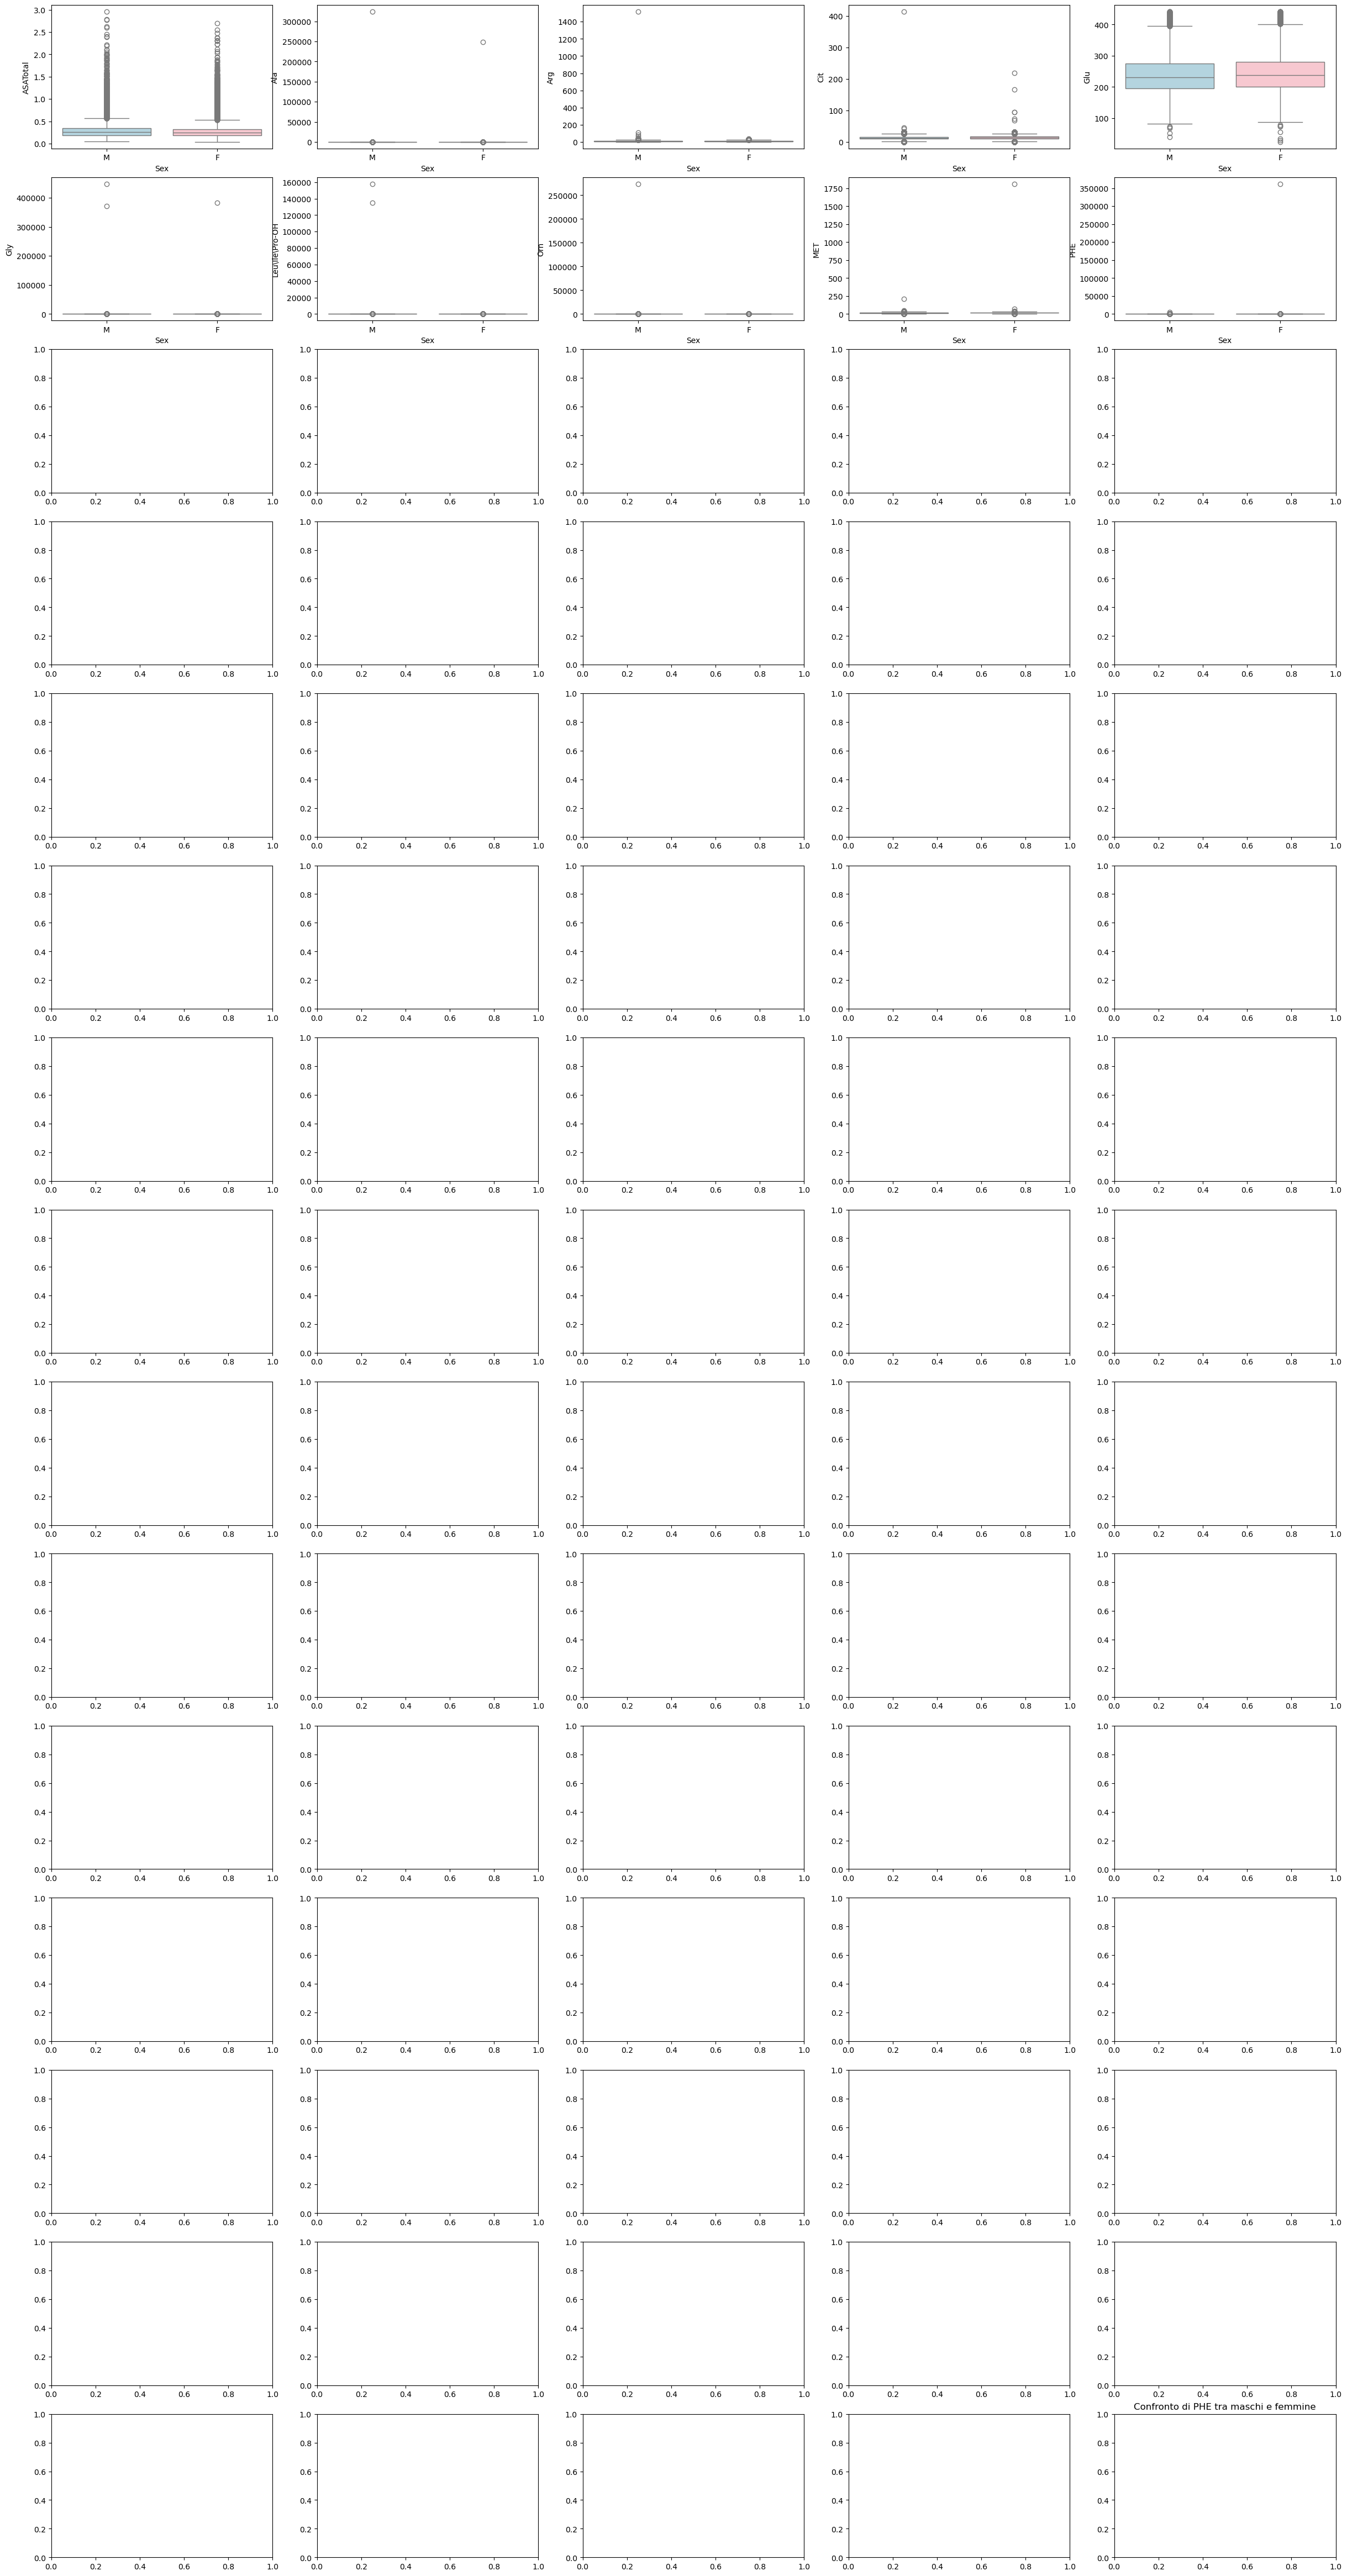

In [114]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in ciccioni[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=ciccioni, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_grandi.png')
plt.tight_layout()

**Tabellina carina**

In [322]:
ciccioni.shape[0]

728235

In [339]:
piccoli.shape[0]

42252

In [343]:
extra_piccoli.shape[0]

8808

In [345]:
piccoli_pic.shape[0]

11942

In [347]:
from tabulate import tabulate

# Creazione di un DataFrame Polars
data = {
    'Weight': ['> 2500','2500-2000', '2000-1500', '1500 >'],
    'Size': [ciccioni.shape[0], piccoli.shape[0], piccoli_pic.shape[0], extra_piccoli.shape[0]]
}

df = pl.DataFrame(data)

# Converti Polars DataFrame in Pandas DataFrame per usare tabulate
df_pandas = df.to_pandas()

# Visualizza la tabella con il formato 'grid'
print(tabulate(df_pandas, headers='keys', tablefmt='grid', showindex=False))


+-----------+--------+
| Weight    |   Size |
+===========+========+
| > 2500    | 728235 |
+-----------+--------+
| 2500-2000 |  42252 |
+-----------+--------+
| 2000-1500 |  11942 |
+-----------+--------+
| 1500 >    |   8808 |
+-----------+--------+


#### Distribution comparison

In [135]:
n1 = extra_piccoli.filter(pl.col('DIAGNOSI') != 'SANO').shape[0]

In [137]:
n2 = piccoli_pic.filter(pl.col('DIAGNOSI') != 'SANO').shape[0]

In [139]:
n3 = piccoli.filter(pl.col('DIAGNOSI') != 'SANO').shape[0]

In [141]:
n4 = ciccioni.filter(pl.col('DIAGNOSI') != 'SANO').shape[0]

In [192]:
p1 = round((n1/extra_piccoli.shape[0]) * 100, 2)
p2 = round((n2/piccoli_pic.shape[0]) * 100, 2)
p3 = round((n3/piccoli.shape[0]) * 100, 2) 
p4 = round((n4/ciccioni.shape[0]) * 100, 2)

In [194]:
data = {
    'Weight': ['< 1500', '1500 - 2000', ' 2000 - 2500', ' > 2500'],
    'Size': [extra_piccoli.shape[0], piccoli_pic.shape[0], piccoli.shape[0], ciccioni.shape[0]],
    'Positives': [n1, n2, n3, n4],
    'Percentage': [p1, p2, p3, p4]
}

# Creiamo il DataFrame
dati = pd.DataFrame(data)

In [198]:
dati.to_csv('dati.csv', index=False)

In [149]:
babies.shape

(791752, 101)

In [159]:
babies_no_id = babies.drop(['SampleBarcode', 'id'])

In [161]:
babies_no_id.shape

(791752, 99)

In [184]:
colonne_strane_tot = []

for col in colonne_numeriche:
    max_ = babies_no_id[col].max()
    perc = babies_no_id.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_tot.append(col)
colonne_strane_tot

['Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C24:0-LPC',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '3OH GA',
 'MCA',
 'OROTICO',
 'PIVA',
 'c4-i']

In [186]:
len(colonne_strane_tot)

59

In [188]:
for col in colonne_strane_tot:
    perc = babies_no_id.select(pl.col(col).quantile(0.99)).item()
    babies_no_id = babies_no_id.with_columns(pl.when((pl.col(col) > perc) & (pl.col('DIAGNOSI') == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [206]:
babies_no_id[colonne_numeriche].describe()

shape: (9, 74)
┌────────────┬──────────┬────────────┬──────────┬───┬──────────┬──────────┬────────────┬───────────┐
│ statistic  ┆ ASATotal ┆ Ala        ┆ Arg      ┆ … ┆ c4-b     ┆ c4-i     ┆ Gestationa ┆ Weight    │
│ ---        ┆ ---      ┆ ---        ┆ ---      ┆   ┆ ---      ┆ ---      ┆ lAge       ┆ ---       │
│ str        ┆ f64      ┆ f64        ┆ f64      ┆   ┆ f64      ┆ f64      ┆ ---        ┆ f64       │
│            ┆          ┆            ┆          ┆   ┆          ┆          ┆ f64        ┆           │
╞════════════╪══════════╪════════════╪══════════╪═══╪══════════╪══════════╪════════════╪═══════════╡
│ count      ┆ 50893.0  ┆ 783420.0   ┆ 783431.0 ┆ … ┆ 2854.0   ┆ 2826.0   ┆ 791752.0   ┆ 791752.0  │
│ null_count ┆ 740859.0 ┆ 8332.0     ┆ 8321.0   ┆ … ┆ 788898.0 ┆ 788926.0 ┆ 0.0        ┆ 0.0       │
│ mean       ┆ 0.286824 ┆ 260.768238 ┆ 9.839623 ┆ … ┆ 0.18719  ┆ 0.139468 ┆ 38.763234  ┆ 3215.7346 │
│            ┆          ┆            ┆          ┆   ┆          ┆          ┆            ┆ 01        │
│ std        ┆ 0.175718 ┆ 467.366964 ┆ 7.031175 ┆ … ┆ 0.244404 ┆ 0.089175 ┆ 1.911311   ┆ 533.84266 │
│            ┆          ┆            ┆          ┆   ┆          ┆          ┆            ┆ 1         │
│ min        ┆ 0.036    ┆ 0.0        ┆ 0.0      ┆ … ┆ 0.0      ┆ 0.0      ┆ 23.0       ┆ 350.0     │
│ 25%        ┆ 0.187    ┆ 205.27     ┆ 4.81     ┆ … ┆ 0.063017 ┆ 0.082014 ┆ 38.0       ┆ 2940.0    │
│ 50%        ┆ 0.248    ┆ 248.6      ┆ 8.2      ┆ … ┆ 0.097691 ┆ 0.11894  ┆ 39.0       ┆ 3250.0    │
│ 75%        ┆ 0.332    ┆ 302.99     ┆ 13.12    ┆ … ┆ 0.179185 ┆ 0.173218 ┆ 40.0       ┆ 3550.0    │
│ max        ┆ 2.957    ┆ 324236.445 ┆ 1516.685 ┆ … ┆ 2.432523 ┆ 0.732857 ┆ 43.0       ┆ 5000.0    │
└────────────┴──────────┴────────────┴──────────┴───┴──────────┴──────────┴────────────┴───────────┘

In [210]:
babies_no_id.filter(pl.col('Gly') == 448407.956	)

shape: (1, 99)
┌──────────┬────────┬──────┬──────┬───┬─────┬───────┬───────────┬──────────┐
│ ASATotal ┆ Ala    ┆ Arg  ┆ Cit  ┆ … ┆ BIS ┆ Twins ┆ CATEGORIA ┆ DIAGNOSI │
│ ---      ┆ ---    ┆ ---  ┆ ---  ┆   ┆ --- ┆ ---   ┆ ---       ┆ ---      │
│ f64      ┆ f64    ┆ f64  ┆ f64  ┆   ┆ i64 ┆ i64   ┆ str       ┆ str      │
╞══════════╪════════╪══════╪══════╪═══╪═════╪═══════╪═══════════╪══════════╡
│ null     ┆ 193.97 ┆ 1.86 ┆ 8.89 ┆ … ┆ 0   ┆ 0     ┆ AO        ┆ GA1      │
└──────────┴────────┴──────┴──────┴───┴─────┴───────┴───────────┴──────────┘